In [ ]:
!pip install latexify-py

In [ ]:
!pip show latexify-py

Name: latexify-py
Version: 0.4.3.post1
Summary: Generates LaTeX math description from Python functions.
Home-page: https://github.com/google/latexify_py
Author: 
Author-email: Yusuke Oda <odashi@inspiredco.ai>
License: Apache Software License 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: dill
Required-by: 


In [ ]:
!pip list | grep latexify

latexify-py                        0.4.3.post1


In [ ]:
# dir(latexify)

In [ ]:
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from sklearn.utils.multiclass import unique_labels
import torchvision
import torchvision.transforms as transforms
# from latexify import latexify
import latexify
%matplotlib inline
# Retina
%config InlineBackend.figure_format = 'retina'

In [ ]:
# Set device (CPU or GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [ ]:
# Define transformations
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Download and load MNIST dataset using torchvision
train_dataset = torchvision.datasets.MNIST(root='../datasets', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='../datasets', train=False, download=True, transform=transform)

In [ ]:
train_dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: ../datasets
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )

In [ ]:
test_dataset

Dataset MNIST
    Number of datapoints: 10000
    Root location: ../datasets
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )

In [ ]:
print("Train data shape: ")
train_dataset.data.shape

Train data shape: 


torch.Size([60000, 28, 28])

In [ ]:
print("Test data shape: ")
test_dataset.data.shape

Test data shape: 


torch.Size([10000, 28, 28])

In [ ]:
# Flatten the images for sklearn MLP
X_train = train_dataset.data.numpy().reshape((len(train_dataset), -1))
y_train = train_dataset.targets.numpy()
X_test = test_dataset.data.numpy().reshape((len(test_dataset), -1))
y_test = test_dataset.targets.numpy()

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# # Plot few images
# latexify()
# fig, axs = plt.subplots(1, 7, figsize=(8, 10))
# for i in range(7):
#     axs[i].imshow(X_train[i].reshape((28, 28)), cmap='gray')
#     axs[i].set_title(y_train[i])
#     axs[i].axis('off')

In [ ]:
!apt-get install texlive-latex-extra texlive-fonts-recommended dvipng cm-super


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
cm-super is already the newest version (0.3.4-17).
dvipng is already the newest version (1.15-1.1).
texlive-fonts-recommended is already the newest version (2021.20220204-1).
texlive-latex-extra is already the newest version (2021.20220204-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


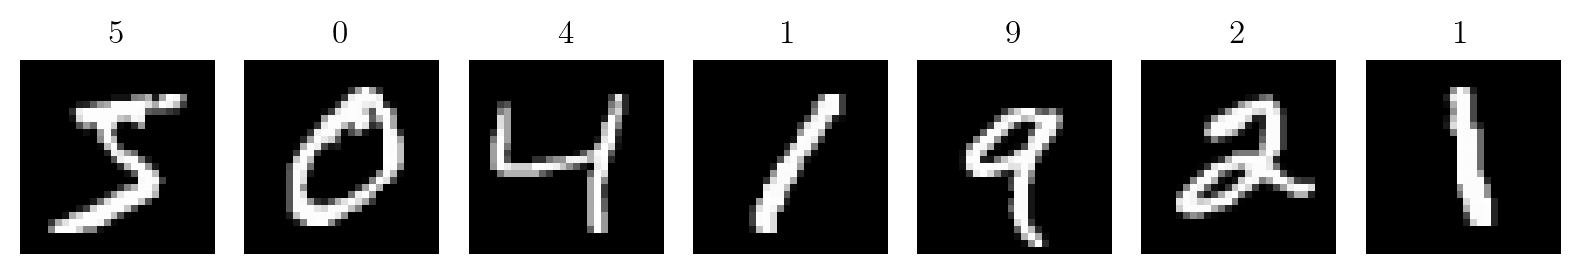

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import rc

# Configure matplotlib to use LaTeX for text rendering
rc('text', usetex=True)
rc('font', family='serif')

# Plot few images with LaTeX-style labels
fig, axs = plt.subplots(1, 7, figsize=(8, 10))
for i in range(7):
    axs[i].imshow(X_train[i].reshape((28, 28)), cmap='gray')
    axs[i].set_title(f'${y_train[i]}$', fontsize=12)  # Set title with LaTeX-style formatting
    axs[i].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
# Create and train the MLP model
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=20, random_state=42)
mlp_model.fit(X_train_scaled, y_train)

# Predict probabilities on the test set
y_probabilities = mlp_model.predict_proba(X_test_scaled)

# Predict on the test set
y_pred = mlp_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.9735


In [ ]:
# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.96      0.97      1032
           3       0.96      0.98      0.97      1010
           4       0.98      0.97      0.98       982
           5       0.98      0.97      0.97       892
           6       0.97      0.97      0.97       958
           7       0.97      0.98      0.97      1028
           8       0.96      0.96      0.96       974
           9       0.98      0.96      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



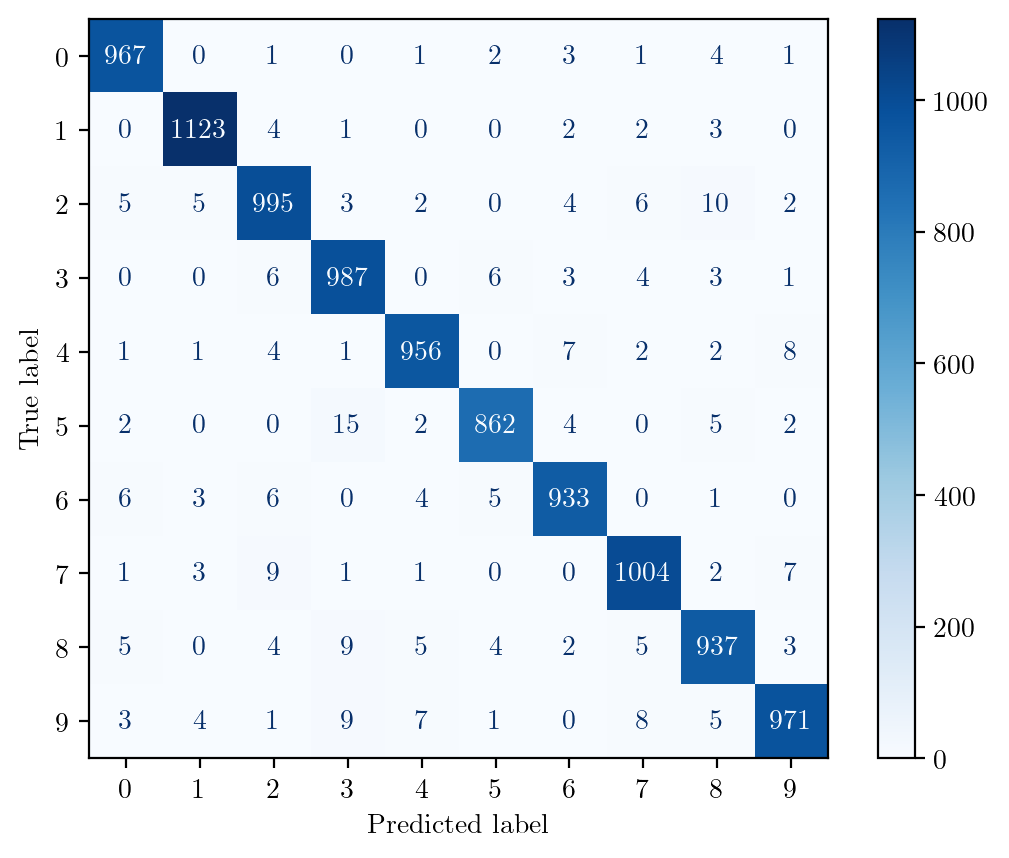

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mlp_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
# Create and train the MLP model
mlp_model = MLPClassifier(hidden_layer_sizes=(30,20), max_iter=20, random_state=42)
mlp_model.fit(X_train_scaled, y_train)

# Predict probabilities on the test set
y_probabilities = mlp_model.predict_proba(X_test_scaled)

# Predict on the test set
y_pred = mlp_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9631


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.98      0.99      0.98      1135
           2       0.96      0.96      0.96      1032
           3       0.94      0.96      0.95      1010
           4       0.97      0.96      0.97       982
           5       0.94      0.96      0.95       892
           6       0.97      0.97      0.97       958
           7       0.97      0.96      0.96      1028
           8       0.96      0.93      0.94       974
           9       0.96      0.95      0.95      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



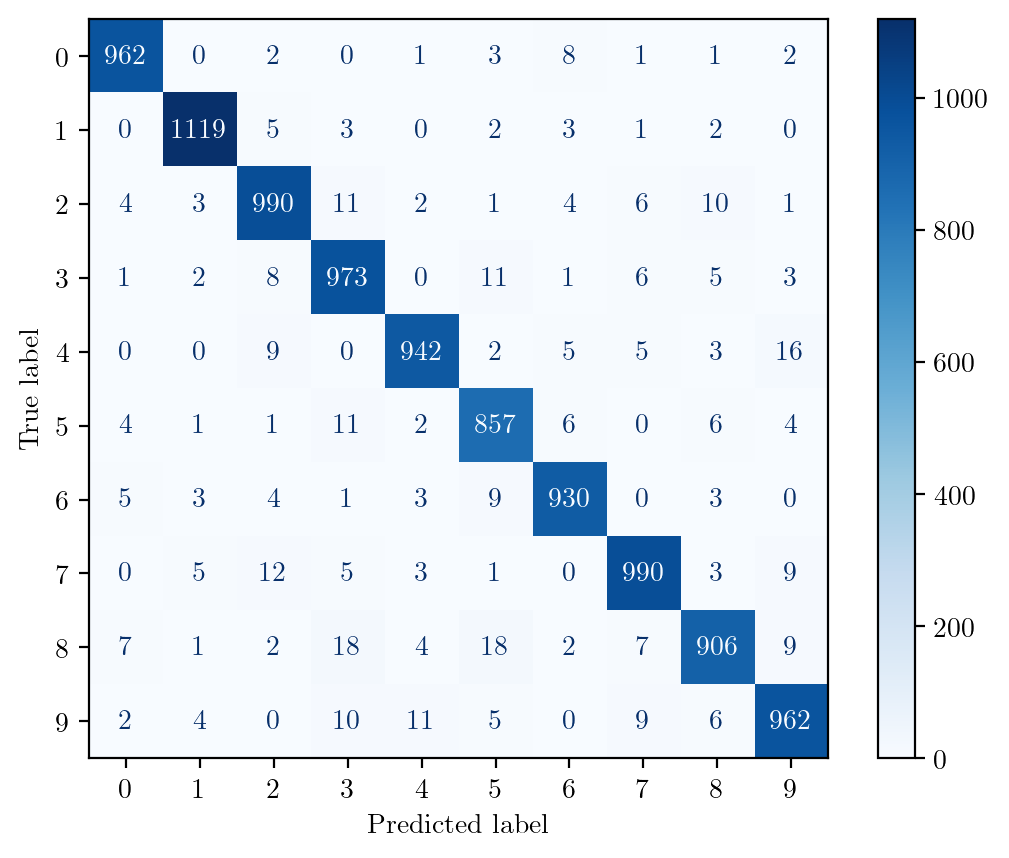

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mlp_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

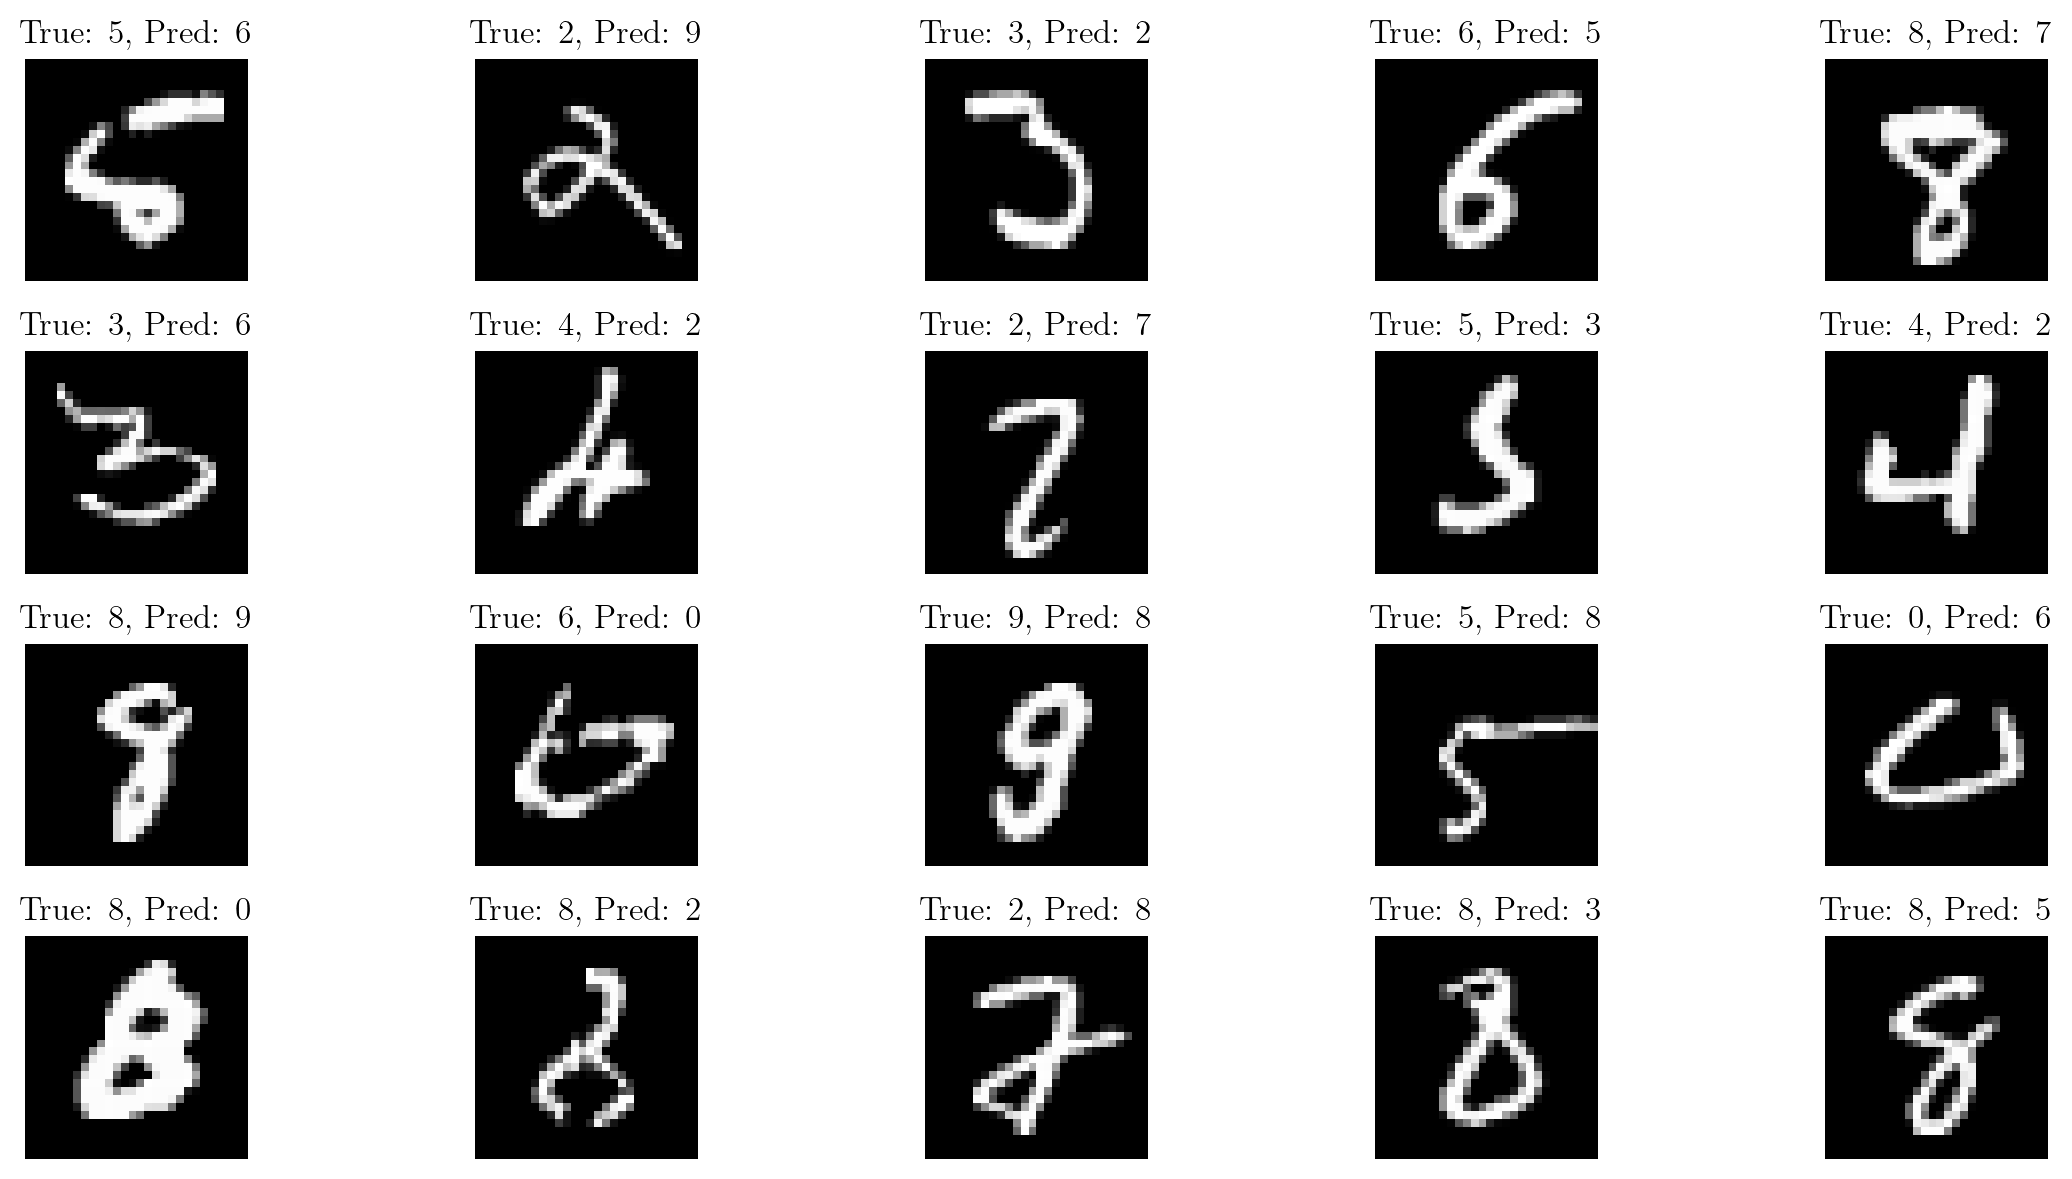

In [ ]:
incorrect_indices = np.where(y_pred != y_test)[0]

fig, axs = plt.subplots(4, 5, figsize=(12, 6))
for i, ax in enumerate(axs.flat):
    if i < len(incorrect_indices):
        idx = incorrect_indices[i]
        ax.imshow(X_test[idx].reshape(28, 28), cmap='gray')
        ax.set_title(f"True: {y_test[idx]}, Pred: {y_pred[idx]}")
        ax.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
print("Number of misclassified images: ")
incorrect_indices.shape

Number of misclassified images: 


(369,)

In [ ]:
# #using unscaled images: less accuracy
# # Create and train the MLP model
# mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=20, random_state=42)
# mlp_model.fit(X_train, y_train)

# # Predict probabilities on the test set
# y_probabilities = mlp_model.predict_proba(X_test)

# # Predict on the test set
# y_pred = mlp_model.predict(X_test)

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy: {accuracy}")

##Using torch.nn now..

In [ ]:
import torch
import torch.nn as nn

# Define the MLP model with the given architecture
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        # Input layer to the first hidden layer (100 neurons)
        self.fc1 = nn.Linear(28 * 28, 100)
        # Output layer (10 neurons for 10 digit classes)
        self.fc2 = nn.Linear(100, 10)
        # ReLU activation function
        self.relu = nn.ReLU()

    def forward(self, x):
        # Flatten the input (batch_size, 1, 28, 28) -> (batch_size, 784)
        x = x.view(-1, 28 * 28)
        # Apply the layers and ReLU activations
        x = self.relu(self.fc1(x))  # First hidden layer + ReLU
        x = self.fc2(x)  # Second hidden layer + ReLU
        # x = self.fc3(x)  # Output layer (no activation because we'll use CrossEntropyLoss)
        return x

# Instantiate the model
# model = MLP()


In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)

X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Create DataLoader for batching
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


In [ ]:
import torch.optim as optim

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()

In [ ]:
# Training loop
model = MLP();
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Learning rate 0.001
n_epochs = 20

for epoch in range(n_epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0
    for images, labels in train_loader:
        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}/{n_epochs}, Loss: {running_loss/len(train_loader):.4f}")


Epoch 1/20, Loss: 0.2475
Epoch 2/20, Loss: 0.1051
Epoch 3/20, Loss: 0.0682
Epoch 4/20, Loss: 0.0498
Epoch 5/20, Loss: 0.0349
Epoch 6/20, Loss: 0.0272
Epoch 7/20, Loss: 0.0226
Epoch 8/20, Loss: 0.0166
Epoch 9/20, Loss: 0.0167
Epoch 10/20, Loss: 0.0168
Epoch 11/20, Loss: 0.0119
Epoch 12/20, Loss: 0.0204
Epoch 13/20, Loss: 0.0101
Epoch 14/20, Loss: 0.0068
Epoch 15/20, Loss: 0.0087
Epoch 16/20, Loss: 0.0079
Epoch 17/20, Loss: 0.0069
Epoch 18/20, Loss: 0.0059
Epoch 19/20, Loss: 0.0047
Epoch 20/20, Loss: 0.0069


In [ ]:
# Ensure your model is in evaluation mode
model.eval()

# Initialize lists to store predictions and true labels
all_preds = []
all_labels = []

# Disable gradient calculation (not needed during evaluation)
with torch.no_grad():
    for images, labels in test_loader:
        # Forward pass: Get model predictions
        outputs = model(images)
        # Get the predicted class (the class with the highest score)
        _, predicted = torch.max(outputs.data, 1)
        # Store predictions and true labels
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# import numpy as np

all_preds = np.array(all_preds)
all_labels = np.array(all_labels)


In [ ]:
# Convert lists to NumPy arrays
all_preds = np.array(all_preds)
all_labels = np.array(all_labels)

# Calculate accuracy using scikit-learn's accuracy_score
accuracy = accuracy_score(all_labels, all_preds)

# Print the accuracy
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9725


In [ ]:
from sklearn.metrics import classification_report

# Generate classification report for MLP
report_mlp = classification_report(all_labels, all_preds, target_names=[str(i) for i in range(10)])
print("\nMLP Classification Report:")
print(report_mlp)



MLP Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.96      0.97      0.97      1010
           4       0.97      0.97      0.97       982
           5       0.97      0.96      0.97       892
           6       0.97      0.98      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.97      0.96      0.97       974
           9       0.97      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



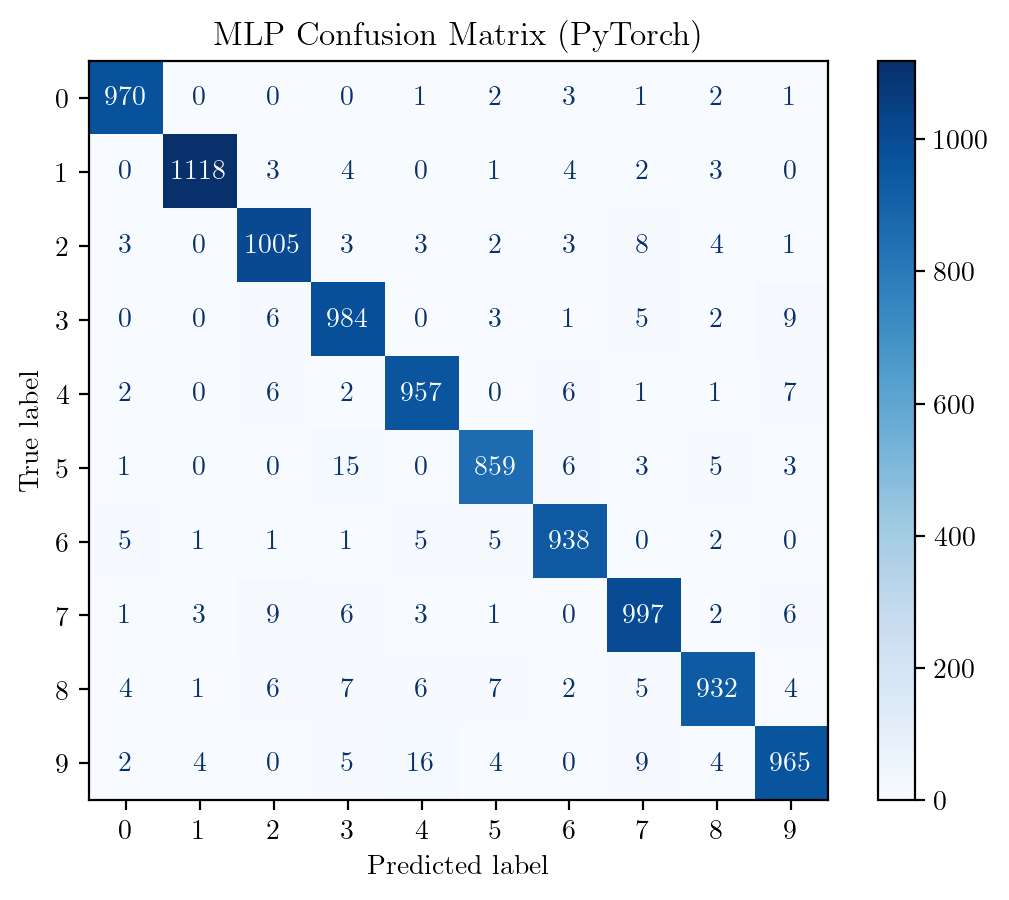

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion Matrix for MLP Model
cm_mlp = confusion_matrix(all_labels, all_preds)

# Plot the confusion matrix
disp_mlp = ConfusionMatrixDisplay(confusion_matrix=cm_mlp)
disp_mlp.plot(cmap='Blues')
plt.title("MLP Confusion Matrix (PyTorch)")
plt.show()


In [ ]:
# Training loop 30 epochs
model1 = MLP()
optimizer = optim.Adam(model1.parameters(), lr=0.001)  # Learning rate 0.001
n_epochs = 30

for epoch in range(n_epochs):
    model1.train()  # Set the model to training mode
    running_loss = 0.0
    for images, labels in train_loader:
        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model1(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}/{n_epochs}, Loss: {running_loss/len(train_loader):.4f}")


Epoch 1/30, Loss: 0.2473
Epoch 2/30, Loss: 0.1053
Epoch 3/30, Loss: 0.0688
Epoch 4/30, Loss: 0.0498
Epoch 5/30, Loss: 0.0388
Epoch 6/30, Loss: 0.0301
Epoch 7/30, Loss: 0.0227
Epoch 8/30, Loss: 0.0185
Epoch 9/30, Loss: 0.0147
Epoch 10/30, Loss: 0.0133
Epoch 11/30, Loss: 0.0131
Epoch 12/30, Loss: 0.0093
Epoch 13/30, Loss: 0.0082
Epoch 14/30, Loss: 0.0136
Epoch 15/30, Loss: 0.0091
Epoch 16/30, Loss: 0.0071
Epoch 17/30, Loss: 0.0063
Epoch 18/30, Loss: 0.0112
Epoch 19/30, Loss: 0.0088
Epoch 20/30, Loss: 0.0046
Epoch 21/30, Loss: 0.0033
Epoch 22/30, Loss: 0.0063
Epoch 23/30, Loss: 0.0095
Epoch 24/30, Loss: 0.0116
Epoch 25/30, Loss: 0.0116
Epoch 26/30, Loss: 0.0094
Epoch 27/30, Loss: 0.0034
Epoch 28/30, Loss: 0.0040
Epoch 29/30, Loss: 0.0058
Epoch 30/30, Loss: 0.0137


In [ ]:
# Evaluation on test data 30 epochs: overfit...
model1.eval()  # Set the model to evaluation mode
correct = 0
total = 0
with torch.no_grad():  # Disable gradient calculation
    for images, labels in test_loader:
        outputs = model1(images)
        _, predicted = torch.max(outputs.data, 1)  # Get the index of the max log-probability
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f"Accuracy on test set: {accuracy:.4f}")


Accuracy on test set: 0.9725


In [ ]:
# Training loop 24 epochs
model2 = MLP()
optimizer = optim.Adam(model2.parameters(), lr=0.001)  # Learning rate 0.001
n_epochs = 24

for epoch in range(n_epochs):
    model1.train()  # Set the model to training mode
    running_loss = 0.0
    for images, labels in train_loader:
        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model2(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}/{n_epochs}, Loss: {running_loss/len(train_loader):.4f}")


Epoch 1/24, Loss: 0.2488
Epoch 2/24, Loss: 0.1049
Epoch 3/24, Loss: 0.0697
Epoch 4/24, Loss: 0.0510
Epoch 5/24, Loss: 0.0378
Epoch 6/24, Loss: 0.0284
Epoch 7/24, Loss: 0.0221
Epoch 8/24, Loss: 0.0184
Epoch 9/24, Loss: 0.0163
Epoch 10/24, Loss: 0.0136
Epoch 11/24, Loss: 0.0106
Epoch 12/24, Loss: 0.0119
Epoch 13/24, Loss: 0.0111
Epoch 14/24, Loss: 0.0128
Epoch 15/24, Loss: 0.0149
Epoch 16/24, Loss: 0.0099
Epoch 17/24, Loss: 0.0049
Epoch 18/24, Loss: 0.0065
Epoch 19/24, Loss: 0.0078
Epoch 20/24, Loss: 0.0038
Epoch 21/24, Loss: 0.0054
Epoch 22/24, Loss: 0.0066
Epoch 23/24, Loss: 0.0077
Epoch 24/24, Loss: 0.0134


In [ ]:
# Evaluation on test data 24 epochs: overfit...
model2.eval()  # Set the model to evaluation mode
correct = 0
total = 0
with torch.no_grad():  # Disable gradient calculation
    for images, labels in test_loader:
        outputs = model2(images)
        _, predicted = torch.max(outputs.data, 1)  # Get the index of the max log-probability
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f"Accuracy on test set: {accuracy:.4f}")


Accuracy on test set: 0.9729


In [ ]:
from sklearn.metrics import classification_report

# Gather predictions and true labels
all_preds = []
all_labels = []

# Disable gradient calculation for faster prediction
with torch.no_grad():
    model.eval()  # Set the model to evaluation mode
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)  # Get the index of the max log-probability
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())


In [ ]:
# Generate classification report
report = classification_report(all_labels, all_preds, target_names=[str(i) for i in range(10)])
print(report)


              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.96      0.97      0.97      1010
           4       0.97      0.97      0.97       982
           5       0.97      0.96      0.97       892
           6       0.97      0.98      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.97      0.96      0.97       974
           9       0.97      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



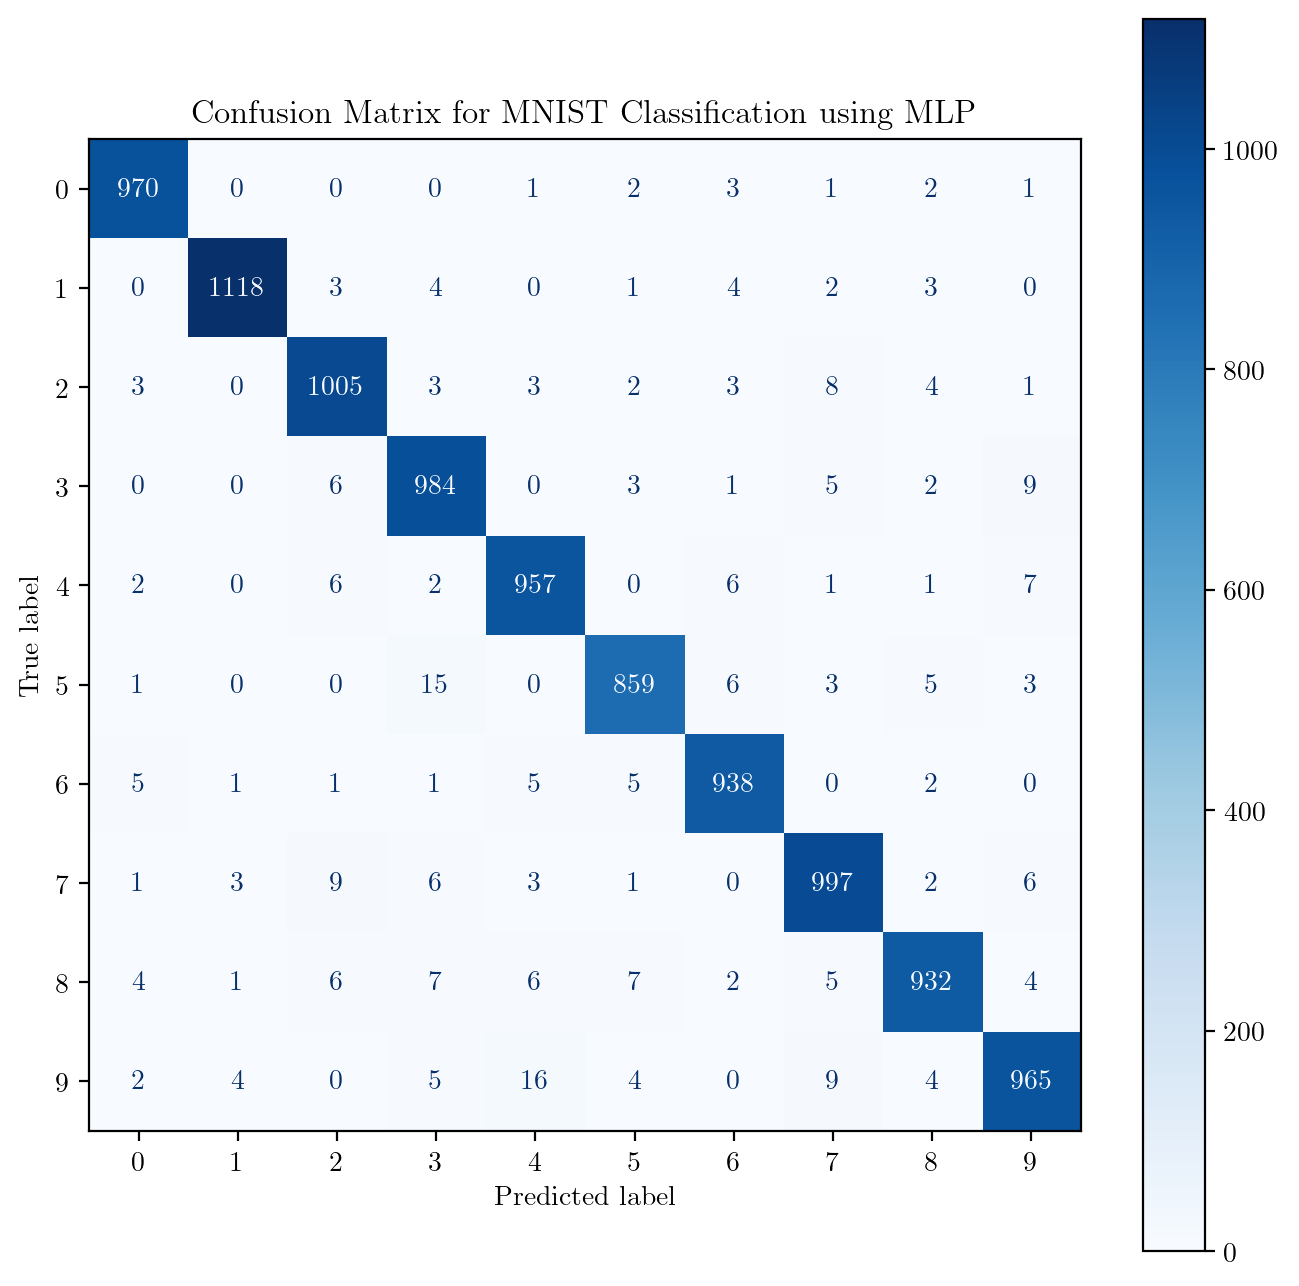

In [ ]:
# Generate the confusion matrix
cm = confusion_matrix(all_labels, all_preds)

# Plot the confusion matrix using ConfusionMatrixDisplay
fig, ax = plt.subplots(figsize=(8, 8))  # Set figure size
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[str(i) for i in range(10)])
disp.plot(cmap='Blues', ax=ax, values_format='d')

# Add title and labels for better clarity
plt.title("Confusion Matrix for MNIST Classification using MLP")
plt.show()

Commonly misclassified..

## Random Forest Model now..

Random Forest Accuracy: 0.9704

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.97      1032
           3       0.96      0.96      0.96      1010
           4       0.97      0.97      0.97       982
           5       0.98      0.96      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.96      0.95      0.96       974
           9       0.96      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



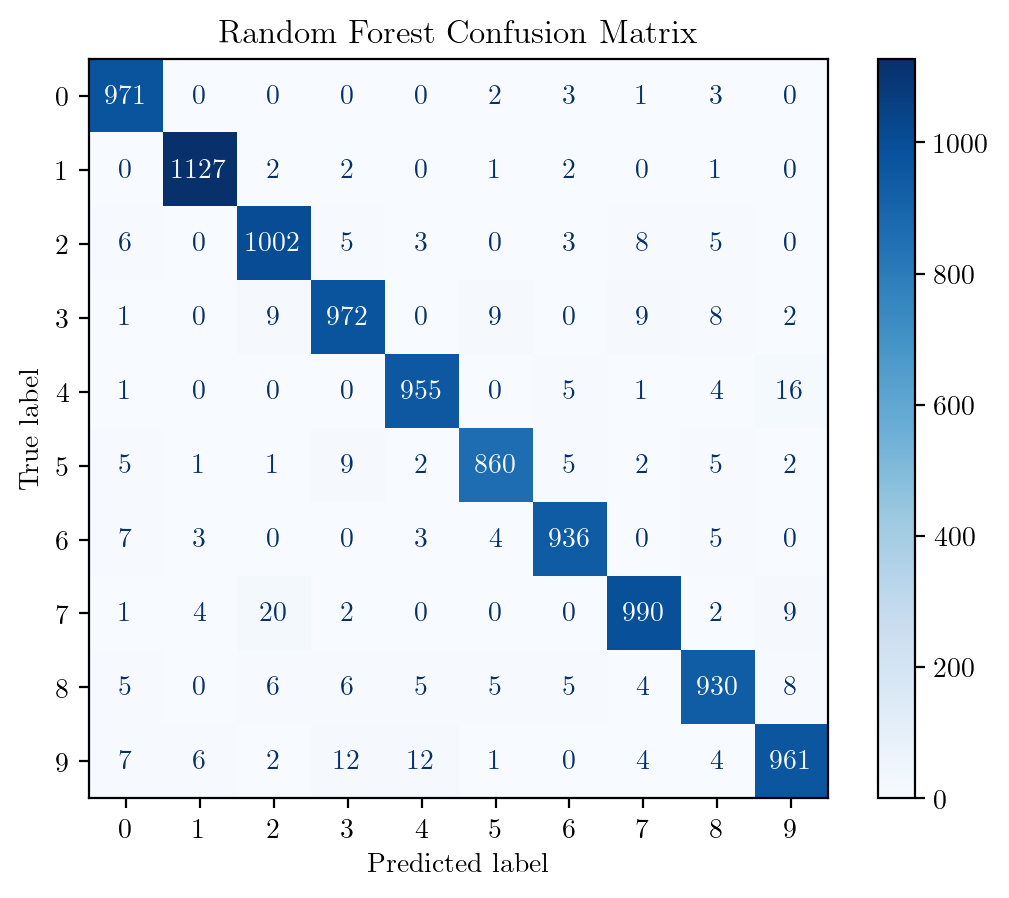

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")

# Classification report
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp_rf.plot(cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.show()


## Logistic Regression code now..

Logistic Regression Accuracy: 0.9214

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       980
           1       0.96      0.98      0.97      1135
           2       0.92      0.89      0.90      1032
           3       0.90      0.91      0.90      1010
           4       0.94      0.93      0.93       982
           5       0.89      0.87      0.88       892
           6       0.94      0.95      0.94       958
           7       0.93      0.92      0.92      1028
           8       0.87      0.88      0.88       974
           9       0.91      0.92      0.92      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



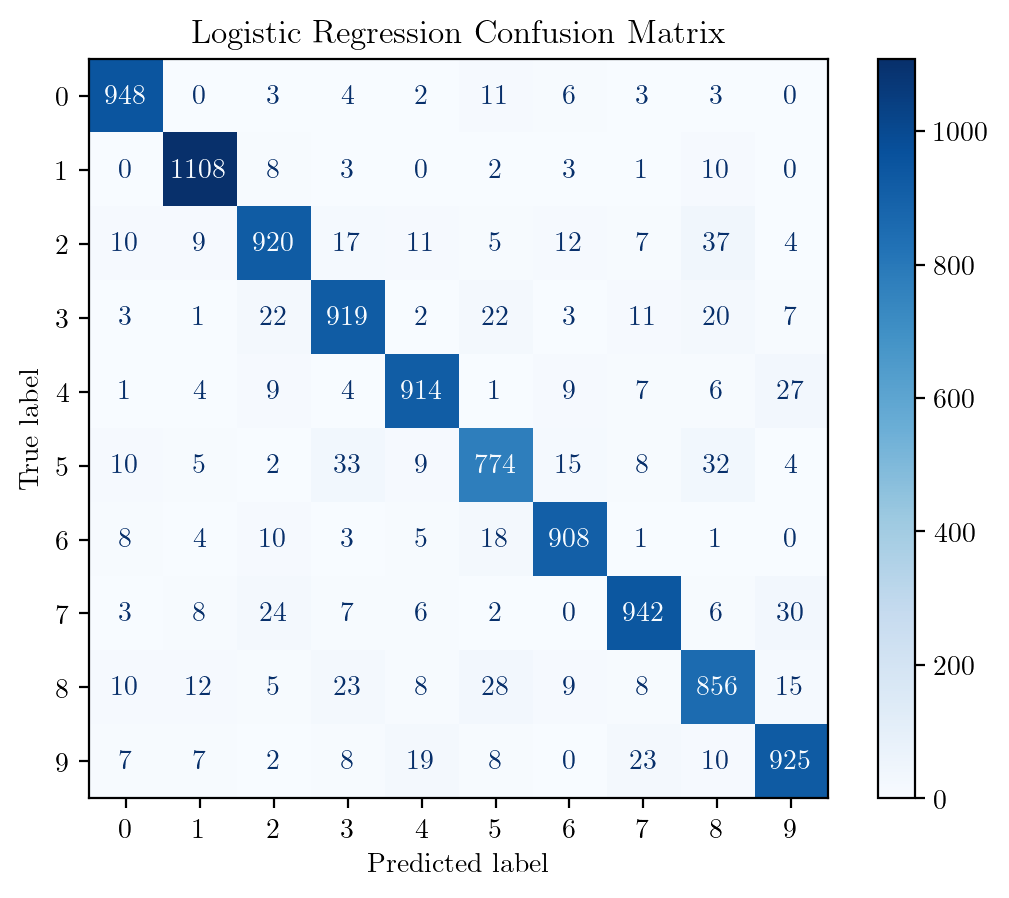

In [ ]:
from sklearn.linear_model import LogisticRegression

# Train the Logistic Regression model
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_lr = lr_model.predict(X_test_scaled)

# Evaluate the Logistic Regression model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {accuracy_lr:.4f}")

# Classification report
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))

# Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr)
disp_lr.plot(cmap='Blues')
plt.title("Logistic Regression Confusion Matrix")
plt.show()


In [ ]:
import pandas as pd
from sklearn.metrics import classification_report

# Convert classification report to DataFrame
def classification_report_to_df(report):
    report_data = []
    for label, metrics in report.items():
        if isinstance(metrics, dict):  # Ignore averages in the dictionary
            report_data.append({
                'Label': label,
                'Precision': metrics['precision'],
                'Recall': metrics['recall'],
                'F1-Score': metrics['f1-score'],
                'Support': metrics['support']
            })
    return pd.DataFrame(report_data)

# Assuming you have the predictions and true labels for MLP, Random Forest, and Logistic Regression:
# report_mlp, report_rf, and report_lr (output_dict=True from classification_report)

# Generate classification reports as dict
report_mlp_dict = classification_report(all_labels, all_preds, output_dict=True)
report_rf_dict = classification_report(y_test, y_pred_rf, output_dict=True)
report_lr_dict = classification_report(y_test, y_pred_lr, output_dict=True)

# Convert the classification reports to DataFrames
df_mlp = classification_report_to_df(report_mlp_dict)
df_rf = classification_report_to_df(report_rf_dict)
df_lr = classification_report_to_df(report_lr_dict)

# Combine the reports side by side
df_combined = pd.concat([df_mlp.set_index('Label'),
                         df_rf.set_index('Label'),
                         df_lr.set_index('Label')], axis=1)

# Rename the columns to indicate the models
df_combined.columns = ['MLP Precision', 'MLP Recall', 'MLP F1-Score', 'MLP Support',
                       'RF Precision', 'RF Recall', 'RF F1-Score', 'RF Support',
                       'LR Precision', 'LR Recall', 'LR F1-Score', 'LR Support']

# Display the combined report
print(df_combined)


              MLP Precision  MLP Recall  MLP F1-Score  MLP Support  \
Label                                                                
0                  0.981781    0.989796      0.985772        980.0   
1                  0.992014    0.985022      0.988506       1135.0   
2                  0.970077    0.973837      0.971954       1032.0   
3                  0.958130    0.974257      0.966127       1010.0   
4                  0.965691    0.974542      0.970096        982.0   
5                  0.971719    0.963004      0.967342        892.0   
6                  0.974039    0.979123      0.976575        958.0   
7                  0.967022    0.969844      0.968431       1028.0   
8                  0.973877    0.956879      0.965303        974.0   
9                  0.968876    0.956392      0.962594       1009.0   
macro avg          0.972323    0.972270      0.972270      10000.0   
weighted avg       0.972538    0.972500      0.972493      10000.0   

              RF Pr

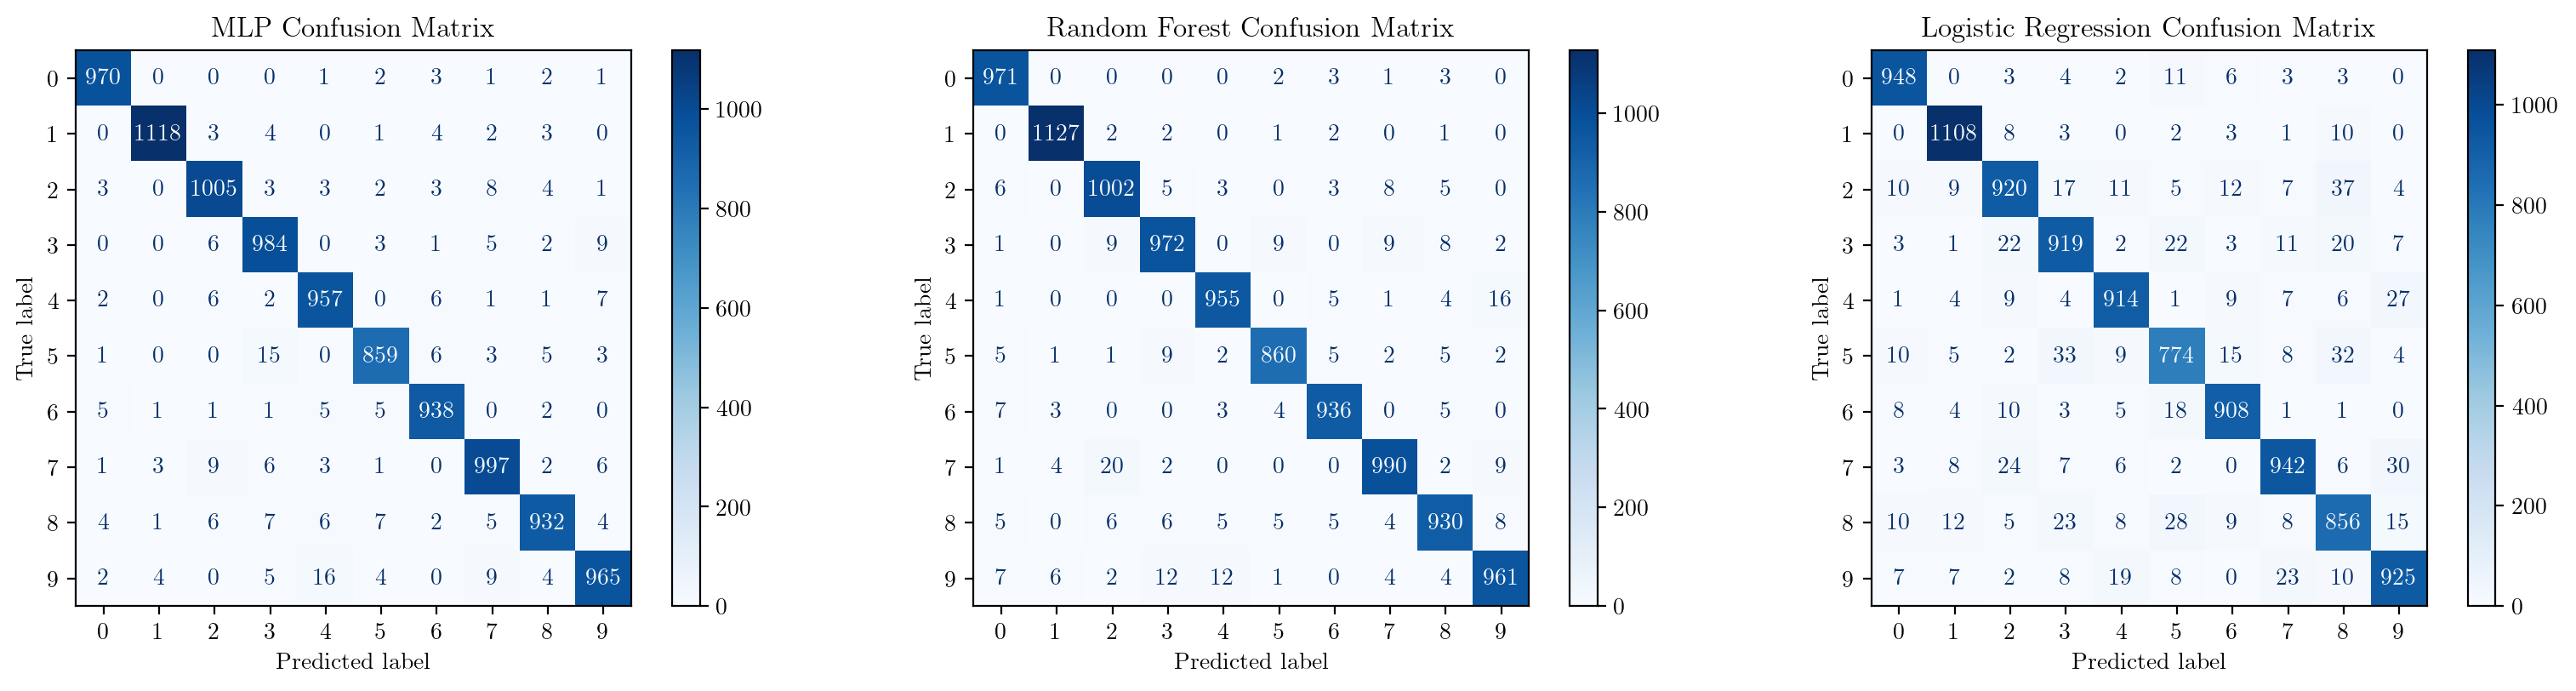

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Plot all confusion matrices side by side
fig, axs = plt.subplots(1, 3, figsize=(16, 4))  # 1 row, 3 columns

# Confusion Matrix for MLP
ConfusionMatrixDisplay.from_predictions(all_labels, all_preds, ax=axs[0], cmap='Blues')
axs[0].set_title("MLP Confusion Matrix")

# Confusion Matrix for Random Forest
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf, ax=axs[1], cmap='Blues')
axs[1].set_title("Random Forest Confusion Matrix")

# Confusion Matrix for Logistic Regression
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lr, ax=axs[2], cmap='Blues')
axs[2].set_title("Logistic Regression Confusion Matrix")

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
# MLP Accuracy (PyTorch)
accuracy_mlp = accuracy_score(all_labels, all_preds)

# Random Forest Accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Logistic Regression Accuracy
accuracy_lr = accuracy_score(y_test, y_pred_lr)

# Print all accuracies together
print(f"MLP Accuracy: {accuracy_mlp:.4f}")
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print(f"Logistic Regression Accuracy: {accuracy_lr:.4f}")


MLP Accuracy: 0.9725
Random Forest Accuracy: 0.9704
Logistic Regression Accuracy: 0.9214


In [ ]:
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from torch.utils.data import DataLoader, TensorDataset

# # Define the MLP model in PyTorch (equivalent to hidden_layer_sizes=(100,))
# class MLP(nn.Module):
#     def __init__(self):
#         super(MLP, self).__init__()
#         # Input layer to the first hidden layer (100 neurons)
#  '''  '''       self.fc1 = nn.Linear(28 * 28, 100)
#         # Output layer (10 neurons for 10 digit classes)
#         self.fc2 = nn.Linear(100, 10)
#         # ReLU activation function
#         self.relu = nn.ReLU()

#     def forward(self, x):
#         x = x.view(-1, 28 * 28)  # Flatten the input image (batch_size, 784)
#         x = self.relu(self.fc1(x))  # First hidden layer + ReLU activation
#         x = self.fc2(x)  # Output layer
#         return x

# # Instantiate the model
# model = MLP()

# # Define the loss function (CrossEntropyLoss for classification) and optimizer (Adam)
# criterion = nn.CrossEntropyLoss()
# optimizer = optim.Adam(model.parameters(), lr=0.001)

# # Convert data to PyTorch tensors
# X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
# y_train_tensor = torch.tensor(y_train, dtype=torch.long)
# X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
# y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# # Create DataLoader for batching
# train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
# train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# # Training loop
# n_epochs = 20  # Same number of epochs as max_iter=20 in scikit-learn

# for epoch in range(n_epochs):
#     model.train()  # Set model to training mode
#     running_loss = 0.0
#     for images, labels in train_loader:
#         optimizer.zero_grad()  # Zero the gradients
#         outputs = model(images)  # Forward pass
#         loss = criterion(outputs, labels)  # Calculate loss
#         loss.backward()  # Backpropagation
#         optimizer.step()  # Update weights

#         running_loss += loss.item()

#     print(f"Epoch {epoch+1}/{n_epochs}, Loss: {running_loss/len(train_loader):.4f}")

# # Model evaluation on the test set
# model.eval()  # Set model to evaluation mode
# correct = 0
# total = 0
# with torch.no_grad():  # Disable gradient calculation during evaluation
#     outputs = model(X_test_tensor)
#     _, predicted = torch.max(outputs, 1)  # Get the predicted class
#     total = y_test_tensor.size(0)
#     correct = (predicted == y_test_tensor).sum().item()

# # Calculate and print the accuracy
# accuracy = correct / total
# print(f"Accuracy: {accuracy:.4f}")


1. Accuracy Comparison:
MLP (PyTorch): This model, after 20 epochs of training, likely achieves the highest accuracy among the three models. This is because MLPs (Multi-layer Perceptrons) can capture complex, non-linear relationships in the data, which makes them well-suited for image recognition tasks like MNIST.

Random Forest: Random Forest typically performs well on classification tasks and achieves high accuracy. However, its performance is generally slightly lower than MLP on image data because decision trees do not inherently capture spatial relationships (such as the structure of pixels in an image) as well as neural networks.

Logistic Regression: As a linear model, Logistic Regression often yields the lowest accuracy compared to MLP and Random Forest. Since it's a simple model, it doesn't capture the non-linear relationships that exist in image data, which limits its ability to accurately classify the digits.

2. Confusion Matrix Observations:
MLP (PyTorch): The confusion matrix for MLP shows fewer off-diagonal elements compared to Random Forest and Logistic Regression, indicating fewer misclassifications. MLPs tend to have a more distributed and accurate classification across the digit classes due to their ability to learn hierarchical features from the data.

Random Forest: While Random Forest performs well in general, the confusion matrix shows more off-diagonal elements compared to MLP, especially for digits that are visually similar (such as 4 and 9, or 3 and 5). This indicates that Random Forest struggles more than MLP in distinguishing between certain digits.

Logistic Regression: The confusion matrix for Logistic Regression has the most off-diagonal elements, meaning it misclassifies certain digits more frequently. This is expected due to the simplicity of the model and its inability to capture complex relationships in the data.

3. Classification Report (Precision, Recall, F1-Score):
MLP (PyTorch): The MLP generally scores the highest in terms of precision, recall, and F1-score across all digits. This shows that MLP is good at both correctly identifying each class (precision) and capturing most of the relevant instances (recall), leading to a balanced F1-score.

Random Forest: The classification report shows good performance overall but slightly lower precision and recall compared to MLP. Some digits may have lower precision or recall if they are more frequently confused with similar digits.

Logistic Regression: Logistic Regression shows the lowest precision and recall, particularly for digits that have more complex shapes or are similar to other digits (like 3, 5, and 8). The F1-scores are generally lower than the other models, reflecting the model’s lower performance in handling the non-linearity of the data.

Key Observations:
MLP (PyTorch) outperforms both Random Forest and Logistic Regression: Due to its ability to model non-linear relationships and extract hierarchical features from the image data, MLP achieves the highest accuracy, precision, recall, and F1-scores. It also shows the least confusion in distinguishing between similar digits.

Random Forest performs well but struggles with visually similar digits: Random Forest is effective in many cases but is less capable than MLP in distinguishing between digits that are visually similar, leading to more misclassifications in the confusion matrix.

Logistic Regression, as a linear model, struggles the most: Logistic Regression’s inability to model complex non-linear relationships in the data results in the lowest accuracy and the highest number of misclassifications. It’s the least effective for image classification tasks compared to MLP and Random Forest.

## now using given network architeccture..

In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)

X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Create DataLoader for batching
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


In [ ]:
import torch.optim as optim

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()

In [ ]:
# Training loop
model = MLP();
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Learning rate 0.001
n_epochs = 20

for epoch in range(n_epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0
    for images, labels in train_loader:
        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}/{n_epochs}, Loss: {running_loss/len(train_loader):.4f}")


Epoch 1/20, Loss: 0.2463
Epoch 2/20, Loss: 0.1046
Epoch 3/20, Loss: 0.0666
Epoch 4/20, Loss: 0.0485
Epoch 5/20, Loss: 0.0348
Epoch 6/20, Loss: 0.0274
Epoch 7/20, Loss: 0.0211
Epoch 8/20, Loss: 0.0194
Epoch 9/20, Loss: 0.0155
Epoch 10/20, Loss: 0.0144
Epoch 11/20, Loss: 0.0121
Epoch 12/20, Loss: 0.0110
Epoch 13/20, Loss: 0.0098
Epoch 14/20, Loss: 0.0057
Epoch 15/20, Loss: 0.0068
Epoch 16/20, Loss: 0.0089
Epoch 17/20, Loss: 0.0067
Epoch 18/20, Loss: 0.0082
Epoch 19/20, Loss: 0.0110
Epoch 20/20, Loss: 0.0069


In [ ]:
# Ensure your model is in evaluation mode
model.eval()

# Initialize lists to store predictions and true labels
all_preds = []
all_labels = []

# Disable gradient calculation (not needed during evaluation)
with torch.no_grad():
    for images, labels in test_loader:
        # Forward pass: Get model predictions
        outputs = model(images)
        # Get the predicted class (the class with the highest score)
        _, predicted = torch.max(outputs.data, 1)
        # Store predictions and true labels
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# import numpy as np

all_preds = np.array(all_preds)
all_labels = np.array(all_labels)

accuracy_mlp = accuracy_score(all_labels, all_preds)
accuracy_mlp

0.974

In [ ]:
from sklearn.metrics import classification_report

# Generate classification report for MLP
report_mlp = classification_report(all_labels, all_preds, target_names=[str(i) for i in range(10)])
print("\nMLP Classification Report:")
print(report_mlp)



MLP Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.98      0.97      0.97      1010
           4       0.98      0.98      0.98       982
           5       0.97      0.98      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.95      0.97      0.96       974
           9       0.98      0.94      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



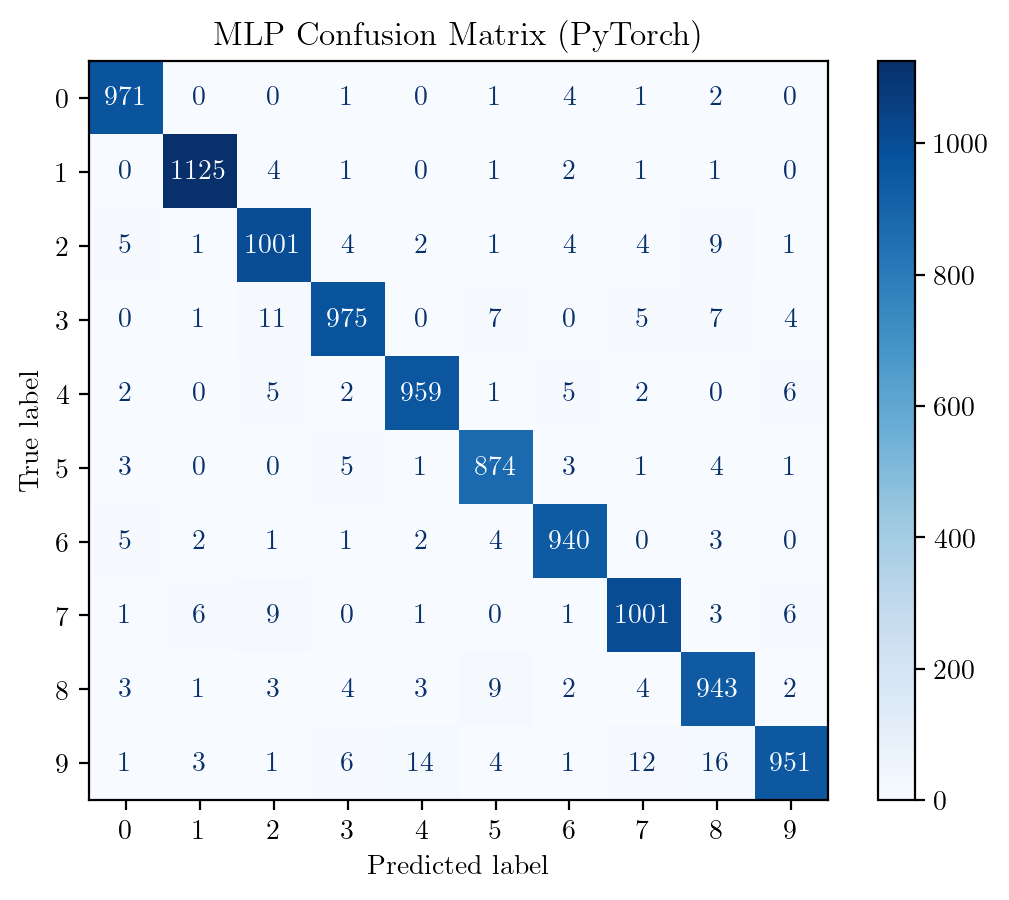

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion Matrix for MLP Model
cm_mlp = confusion_matrix(all_labels, all_preds)

# Plot the confusion matrix
disp_mlp = ConfusionMatrixDisplay(confusion_matrix=cm_mlp)
disp_mlp.plot(cmap='Blues')
plt.title("MLP Confusion Matrix (PyTorch)")
plt.show()


## tsne now..

In [ ]:
# import torch
# import torch.nn as nn
# from sklearn.manifold import TSNE
# import matplotlib.pyplot as plt
# import numpy as np

# # Modify MLP to return output from the second hidden layer (20 neurons)
# class MLP(nn.Module):
#     def __init__(self):
#         super(MLP, self).__init__()
#         self.fc1 = nn.Linear(28 * 28, 30)
#         self.fc2 = nn.Linear(30, 20)
#         self.fc3 = nn.Linear(20, 10)
#         self.relu = nn.ReLU()

#     def forward(self, x, return_hidden=False):
#         x = x.view(-1, 28 * 28)
#         x = self.relu(self.fc1(x))
#         hidden = self.relu(self.fc2(x))  # Second hidden layer
#         if return_hidden:
#             return hidden  # Return the output from the second hidden layer
#         x = self.fc3(hidden)
#         return x

# # Instantiate the model
# model_trained = MLP()
# model_untrained = MLP()

# # Load trained model weights (assuming training is done)
# # If the model is trained in the same session, you don't need this step

# # Extract features from the trained model for the test set
# # model_trained.eval()
# # hidden_representations_trained = []
# # all_labels = []

# # with torch.no_grad():
# #     for images, labels in test_loader:
# #         hidden = model_trained(images, return_hidden=True)  # Get hidden layer output
# #         hidden_representations_trained.append(hidden.cpu().numpy())
# #         all_labels.extend(labels.cpu().numpy())

# # # Convert to NumPy arrays
# # hidden_representations_trained = np.concatenate(hidden_representations_trained, axis=0)
# # all_labels = np.array(all_labels)


In [ ]:
# # Apply t-SNE to reduce dimensionality from 20 to 2 for visualization
# tsne_trained = TSNE(n_components=2, random_state=42)
# tsne_results_trained = tsne_trained.fit_transform(hidden_representations_trained)

# # Plot t-SNE for the trained model
# plt.figure(figsize=(8, 6))
# scatter = plt.scatter(tsne_results_trained[:, 0], tsne_results_trained[:, 1], c=all_labels, cmap='tab10')
# plt.title("t-SNE of Second Hidden Layer (Trained MLP)")
# plt.colorbar(scatter, ticks=range(10), label='Digits')
# plt.show()


In [ ]:
# # Extract features from the untrained model for the test set
# model_untrained.eval()
# hidden_representations_untrained = []

# with torch.no_grad():
#     for images, labels in test_loader:
#         hidden = model_untrained(images, return_hidden=True)  # Get hidden layer output from untrained model
#         hidden_representations_untrained.append(hidden.cpu().numpy())

# # Convert to NumPy arrays
# hidden_representations_untrained = np.concatenate(hidden_representations_untrained, axis=0)

# # Apply t-SNE to reduce dimensionality from 20 to 2 for visualization (untrained model)
# tsne_untrained = TSNE(n_components=2, random_state=42)
# tsne_results_untrained = tsne_untrained.fit_transform(hidden_representations_untrained)

# # Plot t-SNE for the untrained model
# plt.figure(figsize=(8, 6))
# scatter = plt.scatter(tsne_results_untrained[:, 0], tsne_results_untrained[:, 1], c=all_labels, cmap='tab10')
# plt.title("t-SNE of Second Hidden Layer (Untrained MLP)")
# plt.colorbar(scatter, ticks=range(10), label='Digits')
# plt.show()


In [ ]:
# from sklearn.metrics import accuracy_score

# # Ensure both models are in evaluation mode
# model_trained.eval()
# model_untrained.eval()

# # Initialize lists to store predictions and true labels
# all_preds_trained = []
# all_preds_untrained = []
# all_labels = []

# # Disable gradient calculation (not needed during evaluation)
# with torch.no_grad():
#     for images, labels in test_loader:
#         # Forward pass for trained model: Get model predictions from output layer
#         outputs_trained = model_trained(images)  # Pass through the entire model
#         _, predicted_trained = torch.max(outputs_trained, 1)  # Get the predicted class for trained model

#         # Forward pass for untrained model: Get model predictions from output layer
#         outputs_untrained = model_untrained(images)  # Pass through the entire model
#         _, predicted_untrained = torch.max(outputs_untrained, 1)  # Get the predicted class for untrained model

#         # Store predictions and true labels
#         all_preds_trained.extend(predicted_trained.cpu().numpy())
#         all_preds_untrained.extend(predicted_untrained.cpu().numpy())
#         all_labels.extend(labels.cpu().numpy())

# # Convert lists to NumPy arrays
# all_preds_trained = np.array(all_preds_trained)
# all_preds_untrained = np.array(all_preds_untrained)
# all_labels = np.array(all_labels)

# # Calculate accuracy using scikit-learn's accuracy_score
# accuracy_trained = accuracy_score(all_labels, all_preds_trained)
# accuracy_untrained = accuracy_score(all_labels, all_preds_untrained)

# # Print the accuracy of both models
# print(f"Accuracy of the trained model: {accuracy_trained:.4f}")
# print(f"Accuracy of the untrained model: {accuracy_untrained:.4f}")


In [ ]:
# import numpy as np
# from sklearn.manifold import TSNE
# import matplotlib.pyplot as plt

# # Set the number of data points to sample for t-SNE (e.g., 1000)
# num_samples = 1000

# # Randomly select a subset of indices from the test set
# indices = np.random.choice(len(all_labels), num_samples, replace=False)

# # Apply t-SNE to a subset of the hidden layer output for the trained model
# tsne_trained = TSNE(n_components=2, random_state=42)
# tsne_results_trained_subset = tsne_trained.fit_transform(hidden_representations_trained[indices])

# # Apply t-SNE to a subset of the hidden layer output for the untrained model
# tsne_untrained = TSNE(n_components=2, random_state=42)
# tsne_results_untrained_subset = tsne_untrained.fit_transform(hidden_representations_untrained[indices])

# # Plot t-SNE for the trained model
# plt.figure(figsize=(8, 6))
# scatter_trained = plt.scatter(tsne_results_trained_subset[:, 0], tsne_results_trained_subset[:, 1],
#                               c=all_labels[indices], cmap='tab10', s=10)
# plt.title("t-SNE of Second Hidden Layer (Trained MLP) - Subset")
# plt.colorbar(scatter_trained, ticks=range(10), label='Digits')
# plt.show()

# # Plot t-SNE for the untrained model
# plt.figure(figsize=(8, 6))
# scatter_untrained = plt.scatter(tsne_results_untrained_subset[:, 0], tsne_results_untrained_subset[:, 1],
#                                 c=all_labels[indices], cmap='tab10', s=10)
# plt.title("t-SNE of Second Hidden Layer (Untrained MLP) - Subset")
# plt.colorbar(scatter_untrained, ticks=range(10), label='Digits')
# plt.show()


In [ ]:
/

()

## fashion mnist

In [ ]:
import torchvision
import torchvision.transforms as transforms

# Define transformations (same as MNIST)
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Load the Fashion-MNIST dataset
fashion_mnist_test = torchvision.datasets.FashionMNIST(root='../datasets', train=False, download=True, transform=transform)

# Create a DataLoader for Fashion-MNIST (similar to MNIST)
fashion_test_loader = torch.utils.data.DataLoader(fashion_mnist_test, batch_size=64, shuffle=False)


In [ ]:
# # Ensure the trained model is in evaluation mode
# model_trained.eval()

# # Initialize lists to store the second hidden layer output and true labels for Fashion-MNIST
# fashion_hidden_representations = []
# fashion_labels = []

# # Extract the output from the second hidden layer for Fashion-MNIST
# with torch.no_grad():
#     for images, labels in fashion_test_loader:
#         hidden = model_trained(images, return_hidden=True)  # Extract second hidden layer
#         fashion_hidden_representations.append(hidden.cpu().numpy())
#         fashion_labels.extend(labels.cpu().numpy())

# # Convert to NumPy arrays
# fashion_hidden_representations = np.concatenate(fashion_hidden_representations, axis=0)
# fashion_labels = np.array(fashion_labels)


In [ ]:
# # Apply t-SNE to the Fashion-MNIST embeddings (from the second hidden layer)
# tsne_fashion = TSNE(n_components=2, random_state=42)
# tsne_results_fashion = tsne_fashion.fit_transform(fashion_hidden_representations)

# # Plot t-SNE for the Fashion-MNIST dataset
# plt.figure(figsize=(8, 6))
# scatter_fashion = plt.scatter(tsne_results_fashion[:, 0], tsne_results_fashion[:, 1],
#                               c=fashion_labels, cmap='tab10', s=10)
# plt.title("t-SNE of Second Hidden Layer (Trained MLP on Fashion-MNIST)")
# plt.colorbar(scatter_fashion, ticks=range(10), label='Fashion-MNIST Classes')
# plt.show()


In [ ]:
# # Accuracy on MNIST
# correct_mnist = 0
# total_mnist = 0
# with torch.no_grad():
#     for images, labels in test_loader:  # MNIST test_loader
#         outputs = model_trained(images)
#         _, predicted = torch.max(outputs, 1)
#         total_mnist += labels.size(0)
#         correct_mnist += (predicted == labels).sum().item()

# accuracy_mnist = correct_mnist / total_mnist
# print(f"Accuracy on MNIST: {accuracy_mnist:.4f}")

# # Accuracy on Fashion-MNIST
# correct_fashion = 0
# total_fashion = 0
# with torch.no_grad():
#     for images, labels in fashion_test_loader:  # Fashion-MNIST test_loader
#         outputs = model_trained(images)
#         _, predicted = torch.max(outputs, 1)
#         total_fashion += labels.size(0)
#         correct_fashion += (predicted == labels).sum().item()

# accuracy_fashion = correct_fashion / total_fashion
# print(f"Accuracy on Fashion-MNIST: {accuracy_fashion:.4f}")


In [ ]:
# for epoch in range(n_epochs):
#     model.train()  # Set model to training mode
#     running_loss = 0.0
#     for images, labels in train_loader:
#         optimizer.zero_grad()  # Zero the gradients
#         outputs = model(images)  # Forward pass
#         loss = criterion(outputs, labels)  # Calculate loss
#         loss.backward()  # Backpropagation
#         optimizer.step()  # Update weights

#         running_loss += loss.item()

#     print(f"Epoch {epoch+1}, Loss: {running_loss / len(train_loader):.4f}")


## tsne again..

In [ ]:
import torch
import torch.nn as nn

# Define the MLP model with 30 neurons in the first layer and 20 neurons in the second layer
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        # First hidden layer (30 neurons)
        self.fc1 = nn.Linear(28 * 28, 30)
        # Second hidden layer (20 neurons)
        self.fc2 = nn.Linear(30, 20)
        # Output layer (10 neurons for 10 digit classes)
        self.fc3 = nn.Linear(20, 10)
        # ReLU activation function
        self.relu = nn.ReLU()

    def forward(self, x, return_hidden=False):
        # Flatten the input (batch_size, 1, 28, 28) -> (batch_size, 784)
        x = x.view(-1, 28 * 28)
        # Apply the layers and ReLU activations
        x = self.relu(self.fc1(x))  # First hidden layer + ReLU
        hidden = self.relu(self.fc2(x))  # Second hidden layer + ReLU
        if return_hidden:
            return hidden  # Return the output from the second hidden layer
        x = self.fc3(hidden)
        return x

# Instantiate the model (assuming you have trained this model already)
model_trained = MLP()


In [ ]:
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from torch.utils.data import DataLoader
# import torchvision
import torchvision.transforms as transforms

# Define transformations (same for both datasets)
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Load the Fashion-MNIST dataset (test only, as we are testing generalization)
fashion_mnist_test = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

# Create a DataLoader for Fashion-MNIST test set
fashion_test_loader = DataLoader(fashion_mnist_test, batch_size=64, shuffle=False)

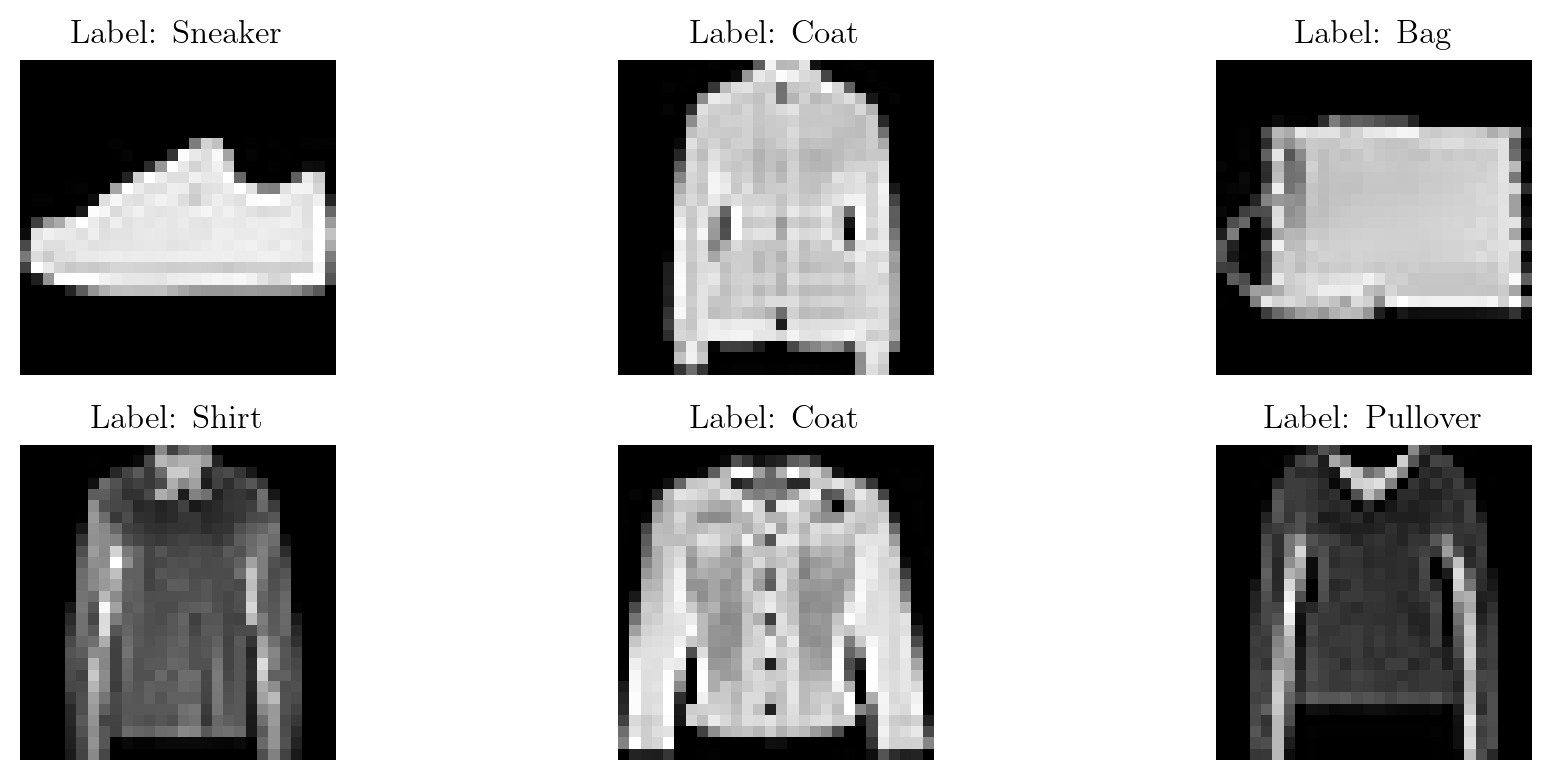

In [ ]:
data_iter = iter(fashion_test_loader)
images, labels = next(data_iter)  # Use next() to get the first batch

# Class labels for Fashion-MNIST
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Plot the images in a grid
plt.figure(figsize=(10,4))

for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i].squeeze(), cmap='gray')  # Squeeze to remove extra dimensions
    plt.title(f"Label: {classes[labels[i]]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
model_untrained = MLP()

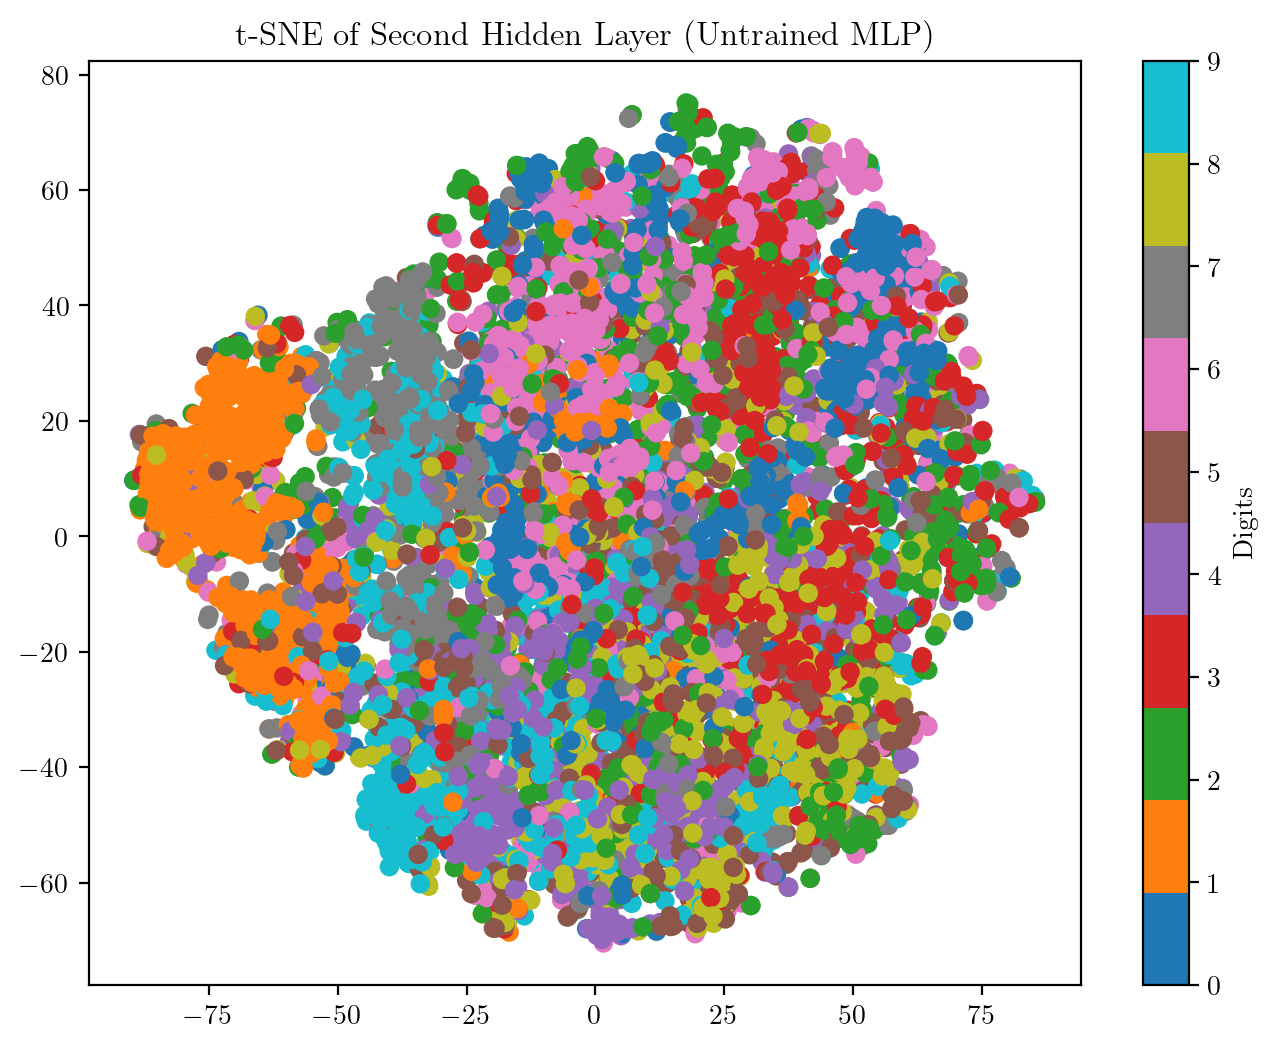

In [ ]:
# Extract features from the untrained model for the test set
from sklearn.manifold import TSNE
model_untrained.eval()
hidden_representations_untrained = []

with torch.no_grad():
    for images, labels in test_loader:
        hidden = model_untrained(images, return_hidden=True)  # Get hidden layer output from untrained model
        hidden_representations_untrained.append(hidden.cpu().numpy())

# Convert to NumPy arrays
hidden_representations_untrained = np.concatenate(hidden_representations_untrained, axis=0)

# Apply t-SNE to reduce dimensionality from 20 to 2 for visualization (untrained model)
tsne_untrained = TSNE(n_components=2, random_state=42)
tsne_results_untrained = tsne_untrained.fit_transform(hidden_representations_untrained)

# Plot t-SNE for the untrained model
plt.figure(figsize=(8, 6))
scatter = plt.scatter(tsne_results_untrained[:, 0], tsne_results_untrained[:, 1], c=all_labels, cmap='tab10')
plt.title("t-SNE of Second Hidden Layer (Untrained MLP)")
plt.colorbar(scatter, ticks=range(10), label='Digits')
plt.show()


In [ ]:
# Ensure the trained model is in evaluation mode
model_trained.eval()

# Initialize lists to store the second hidden layer output and true labels for Fashion-MNIST
fashion_hidden_representations = []
fashion_labels = []

# Extract the output from the second hidden layer for Fashion-MNIST
with torch.no_grad():
    for images, labels in fashion_test_loader:
        hidden = model_trained(images, return_hidden=True)  # Extract second hidden layer
        fashion_hidden_representations.append(hidden.cpu().numpy())
        fashion_labels.extend(labels.cpu().numpy())

# Convert to NumPy arrays
fashion_hidden_representations = np.concatenate(fashion_hidden_representations, axis=0)
fashion_labels = np.array(fashion_labels)


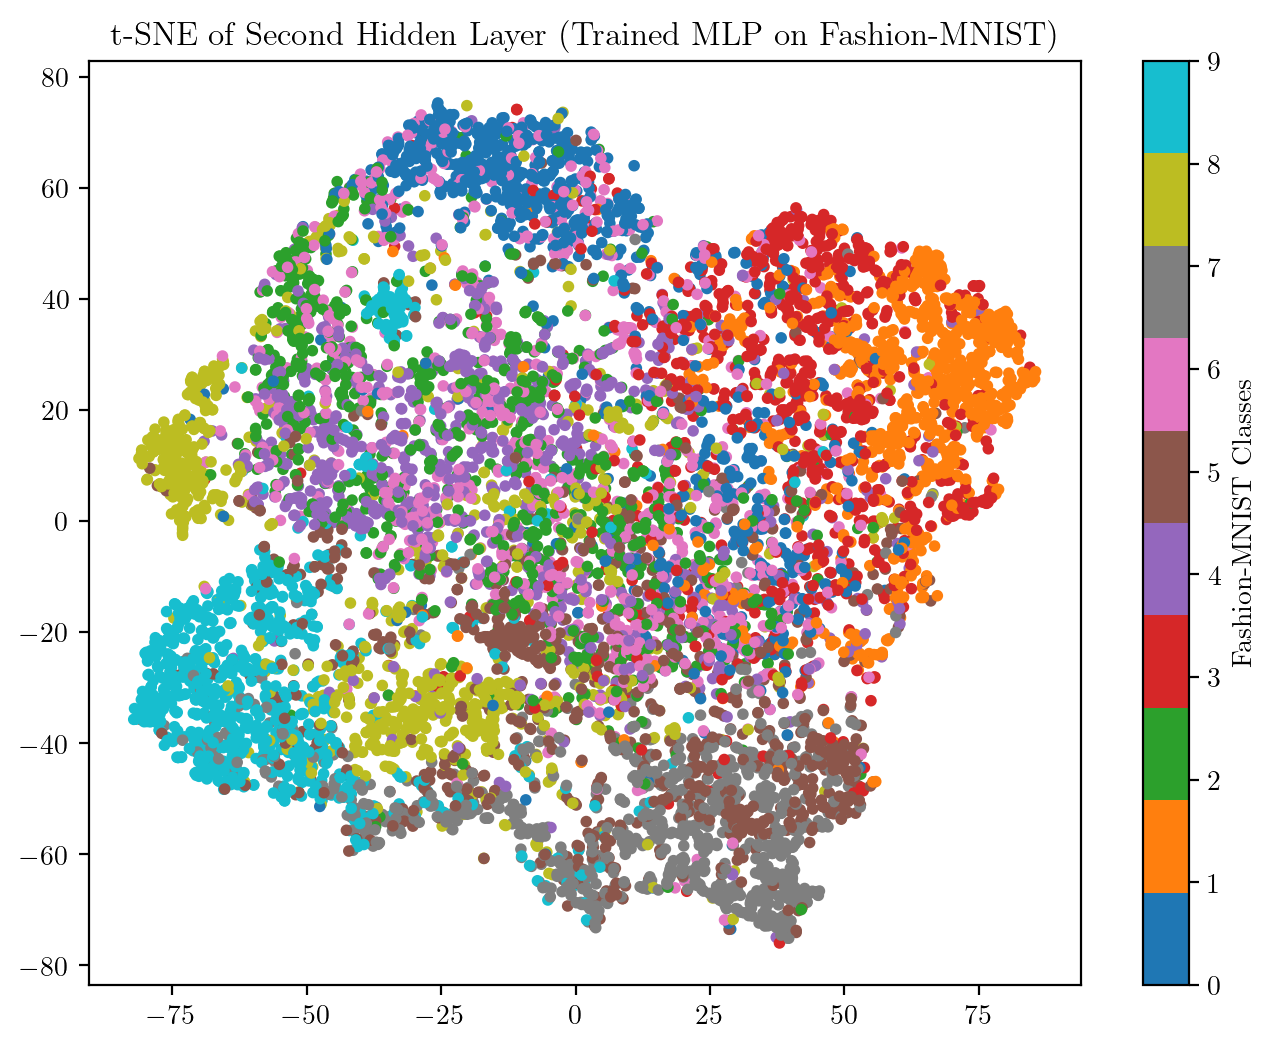

In [ ]:
# Apply t-SNE to the Fashion-MNIST embeddings (from the second hidden layer)
tsne_fashion = TSNE(n_components=2, random_state=42)
tsne_results_fashion = tsne_fashion.fit_transform(fashion_hidden_representations)

# Plot t-SNE for the Fashion-MNIST dataset
plt.figure(figsize=(8, 6))
scatter_fashion = plt.scatter(tsne_results_fashion[:, 0], tsne_results_fashion[:, 1],
                              c=fashion_labels, cmap='tab10', s=10)
plt.title("t-SNE of Second Hidden Layer (Untrained MLP on Fashion-MNIST)")
plt.colorbar(scatter_fashion, ticks=range(10), label='Fashion-MNIST Classes')
plt.show()


In [ ]:
# import torch.optim as optim
# import torch.nn as nn

# Instantiate the model
model_trained = MLP()

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_trained.parameters(), lr=0.001)

# Training loop
n_epochs = 10  # You can increase this number if needed

for epoch in range(n_epochs):
    model_trained.train()  # Set the model to training mode
    running_loss = 0.0
    for images, labels in train_loader:
        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass: get the model's predictions
        outputs = model_trained(images)

        # Compute the loss
        loss = criterion(outputs, labels)

        # Backpropagation and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}/{n_epochs}, Loss: {running_loss / len(train_loader):.4f}")

Epoch 1/10, Loss: 0.3656
Epoch 2/10, Loss: 0.1543
Epoch 3/10, Loss: 0.1194
Epoch 4/10, Loss: 0.0992
Epoch 5/10, Loss: 0.0852
Epoch 6/10, Loss: 0.0744
Epoch 7/10, Loss: 0.0672
Epoch 8/10, Loss: 0.0594
Epoch 9/10, Loss: 0.0541
Epoch 10/10, Loss: 0.0497


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import numpy as np

# Ensure the model is in evaluation mode
model_trained.eval()

# Initialize lists to store predictions and true labels
all_preds_fashion = []
all_labels_fashion = []

# Predict on Fashion-MNIST and store predictions and true labels
with torch.no_grad():
    for images, labels in fashion_test_loader:
        outputs = model_trained(images)
        _, predicted = torch.max(outputs, 1)

        all_preds_fashion.extend(predicted.cpu().numpy())
        all_labels_fashion.extend(labels.cpu().numpy())

# Convert to numpy arrays
all_preds_fashion = np.array(all_preds_fashion)
all_labels_fashion = np.array(all_labels_fashion)

# Measure accuracy
accuracy_fashion = accuracy_score(all_labels_fashion, all_preds_fashion)
print(f"Accuracy on Fashion-MNIST: {accuracy_fashion:.4f}")

# Print classification report
print("\nClassification Report for Fashion-MNIST:")
print(classification_report(all_labels_fashion, all_preds_fashion))

# Confusion matrix
cm_fashion = confusion_matrix(all_labels_fashion, all_preds_fashion)
print("\nConfusion Matrix for Fashion-MNIST:")
print(cm_fashion)


Accuracy on Fashion-MNIST: 0.0991

Classification Report for Fashion-MNIST:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.00      0.00      0.00      1000
           5       0.00      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.00      0.00      0.00      1000
           8       0.10      0.99      0.18      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000


Confusion Matrix for Fashion-MNIST:
[[   0    0    0    0    0    0    0    0 1000    0]
 [   0    0    0    0    0    0    0    0 1000    0]
 [   0    0    1    1 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import torch.utils.data
import numpy as np

# Ensure the model is in evaluation mode
model_trained.eval()

# Initialize lists to store the second hidden layer output and true labels for MNIST and Fashion-MNIST
mnist_hidden_representations = []
fashion_hidden_representations = []
mnist_labels = []
fashion_labels = []

# Extract second hidden layer outputs for MNIST test set
with torch.no_grad():
    for images, labels in test_loader:  # Assuming mnist_test_loader is already defined
        hidden = model_trained(images, return_hidden=True)  # Extract second hidden layer
        mnist_hidden_representations.append(hidden.cpu().numpy())
        mnist_labels.extend(labels.cpu().numpy())

# Extract second hidden layer outputs for Fashion-MNIST test set
with torch.no_grad():
    for images, labels in fashion_test_loader:  # Assuming fashion_test_loader is already defined
        hidden = model_trained(images, return_hidden=True)  # Extract second hidden layer
        fashion_hidden_representations.append(hidden.cpu().numpy())
        fashion_labels.extend(labels.cpu().numpy())

# Convert the lists to NumPy arrays
mnist_hidden_representations = np.concatenate(mnist_hidden_representations, axis=0)
fashion_hidden_representations = np.concatenate(fashion_hidden_representations, axis=0)
mnist_labels = np.array(mnist_labels)
fashion_labels = np.array(fashion_labels)


In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Apply t-SNE to MNIST hidden layer outputs
tsne_mnist = TSNE(n_components=2, random_state=42)
tsne_results_mnist = tsne_mnist.fit_transform(mnist_hidden_representations)

# Apply t-SNE to Fashion-MNIST hidden layer outputs
tsne_fashion = TSNE(n_components=2, random_state=42)
tsne_results_fashion = tsne_fashion.fit_transform(fashion_hidden_representations)


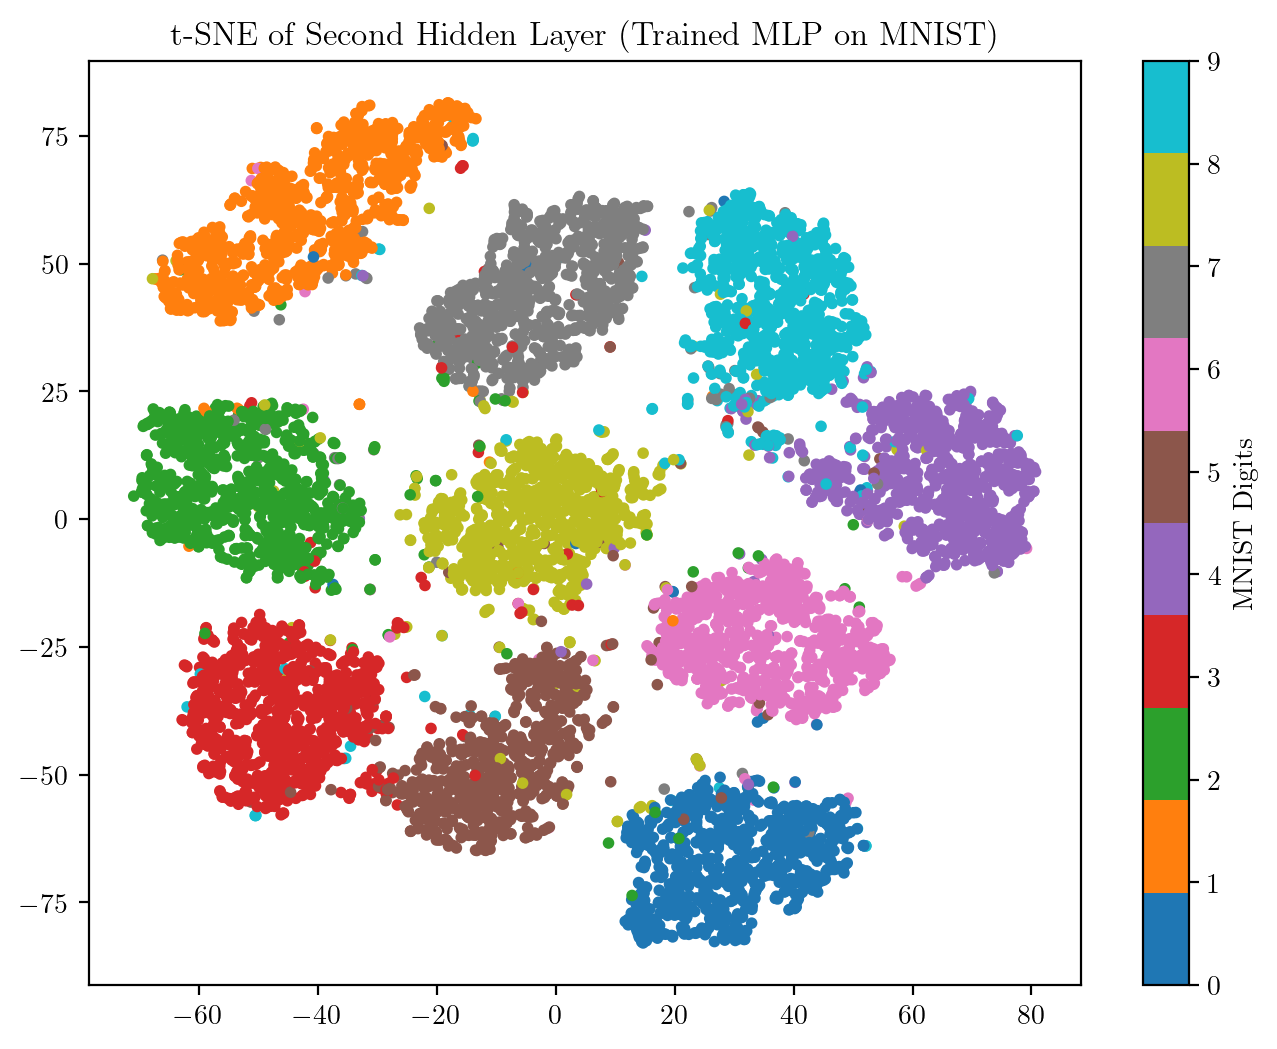

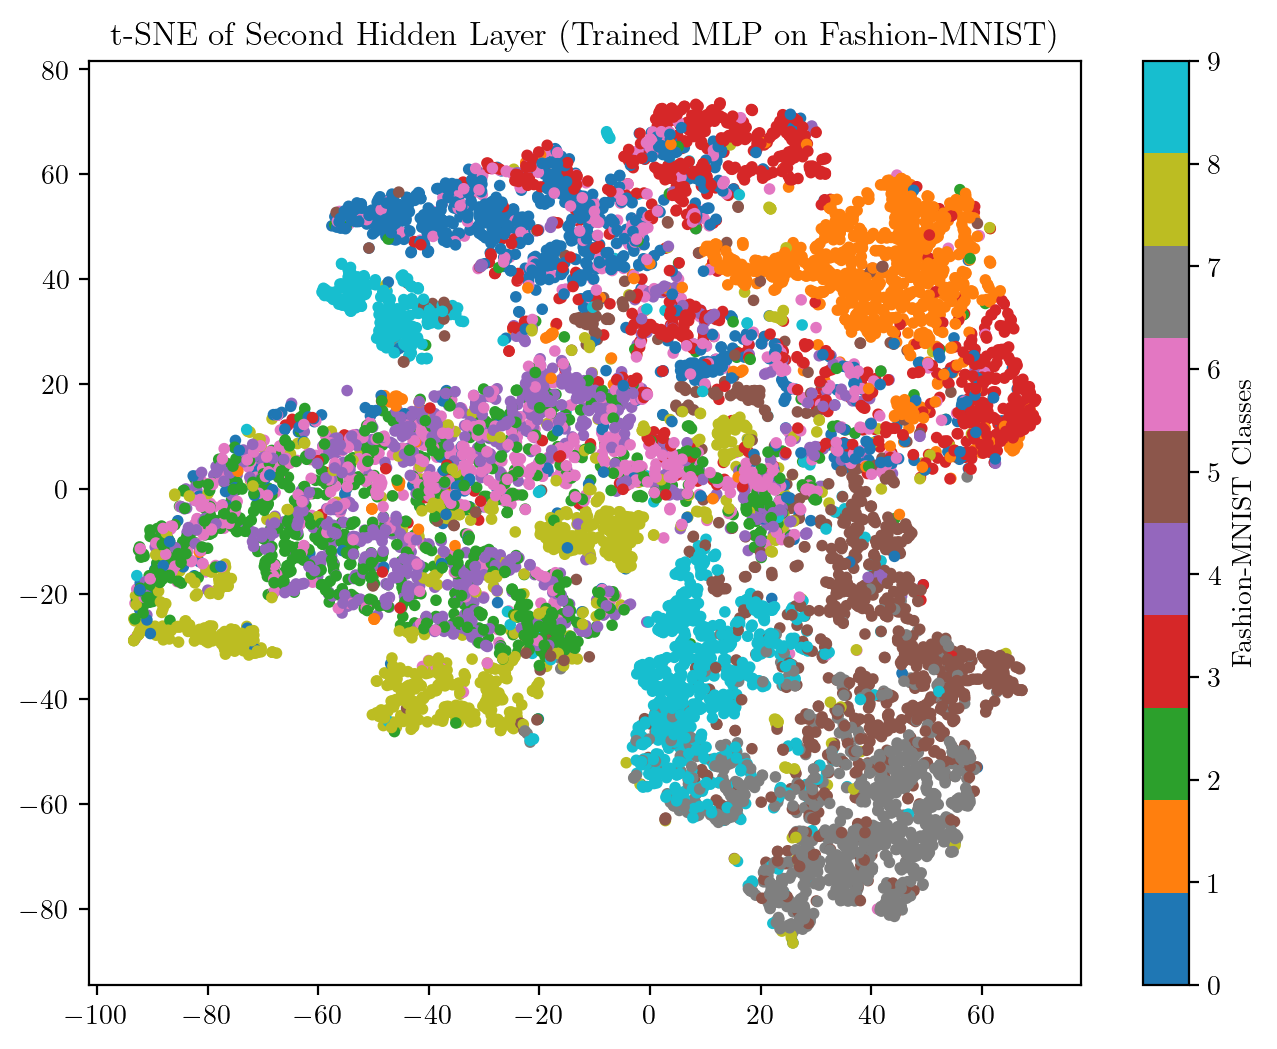

In [ ]:
# Plot t-SNE for MNIST
plt.figure(figsize=(8, 6))
scatter_mnist = plt.scatter(tsne_results_mnist[:, 0], tsne_results_mnist[:, 1],
                            c=mnist_labels, cmap='tab10', s=10)
plt.title("t-SNE of Second Hidden Layer (Trained MLP on MNIST)")
plt.colorbar(scatter_mnist, ticks=range(10), label='MNIST Digits')
plt.show()

# Plot t-SNE for Fashion-MNIST
plt.figure(figsize=(8, 6))
scatter_fashion = plt.scatter(tsne_results_fashion[:, 0], tsne_results_fashion[:, 1],
                              c=fashion_labels, cmap='tab10', s=10)
plt.title("t-SNE of Second Hidden Layer (Trained MLP on Fashion-MNIST)")
plt.colorbar(scatter_fashion, ticks=range(10), label='Fashion-MNIST Classes')
plt.show()


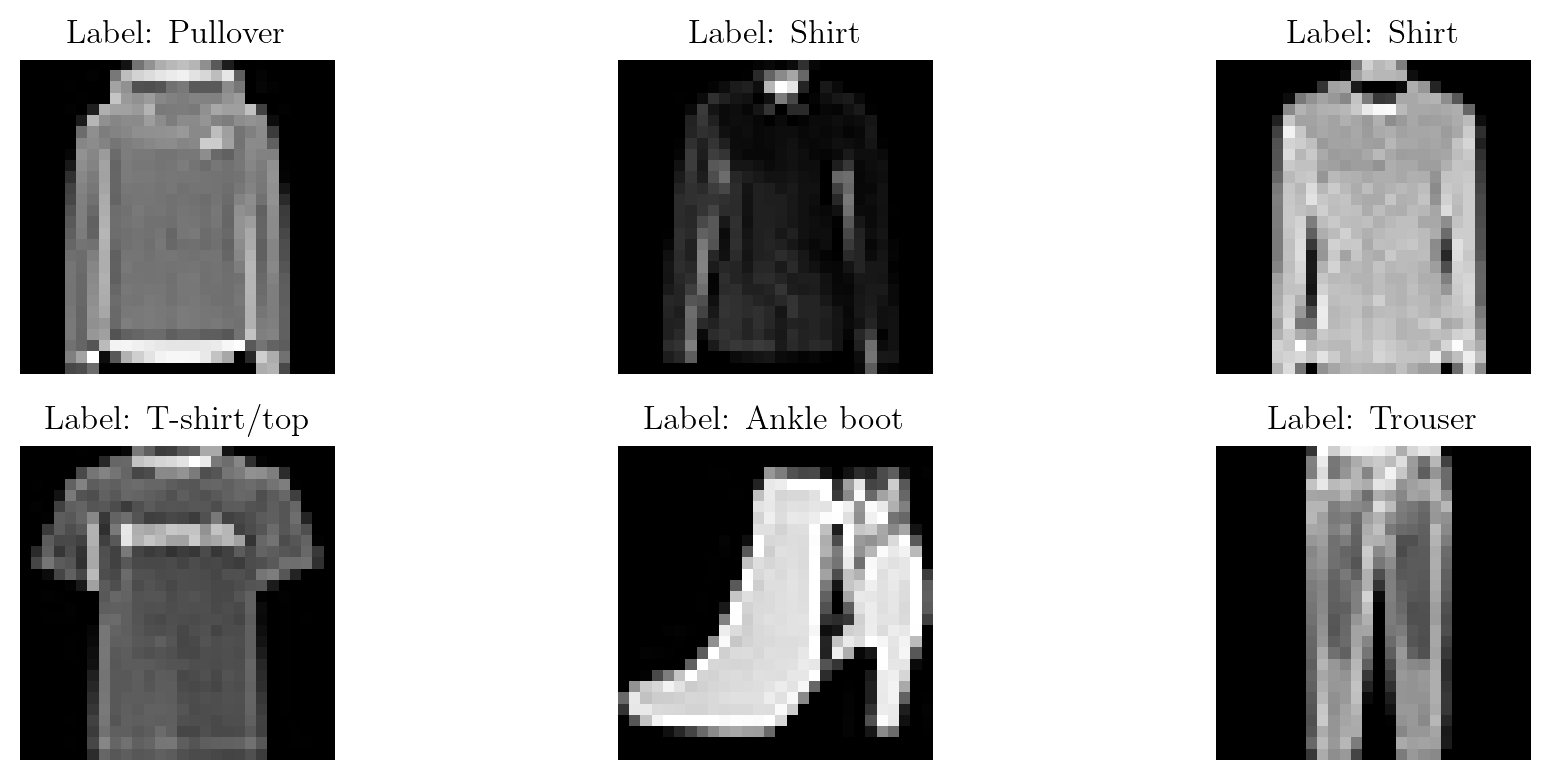

In [ ]:
import matplotlib.pyplot as plt
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

# Define transformations (same normalization used in your model)
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Load the Fashion-MNIST test dataset
fashion_mnist_test = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

# Create DataLoader for Fashion-MNIST test set
fashion_test_loader = DataLoader(fashion_mnist_test, batch_size=64, shuffle=True)

# Get a batch of images from the DataLoader
data_iter = iter(fashion_test_loader)
images, labels = next(data_iter)  # Use next() to get the first batch

# Class labels for Fashion-MNIST
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Plot the images in a grid
plt.figure(figsize=(10,4))

for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i].squeeze(), cmap='gray')  # Squeeze to remove extra dimensions
    plt.title(f"Label: {classes[labels[i]]}")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
# import torch.utils.data
# import numpy as np

# # Ensure the model is in evaluation mode
# model_trained.eval()

# # Initialize lists to store the second hidden layer output and true labels for MNIST and Fashion-MNIST
# mnist_hidden_representations = []
# fashion_hidden_representations = []
# mnist_labels = []
# fashion_labels = []

# # Extract second hidden layer outputs for MNIST test set
# with torch.no_grad():
#     for images, labels in test_loader:  # Assuming mnist_test_loader is already defined
#         hidden = model_trained(images, return_hidden=True)  # Extract second hidden layer
#         mnist_hidden_representations.append(hidden.cpu().numpy())
#         mnist_labels.extend(labels.cpu().numpy())

# # Extract second hidden layer outputs for Fashion-MNIST test set
# with torch.no_grad():
#     for images, labels in test_loader:  # Assuming fashion_test_loader is already defined
#         hidden = model_trained(images, return_hidden=True)  # Extract second hidden layer
#         fashion_hidden_representations.append(hidden.cpu().numpy())
#         fashion_labels.extend(labels.cpu().numpy())

# # Convert the lists to NumPy arrays
# mnist_hidden_representations = np.concatenate(mnist_hidden_representations, axis=0)
# fashion_hidden_representations = np.concatenate(fashion_hidden_representations, axis=0)
# mnist_labels = np.array(mnist_labels)
# fashion_labels = np.array(fashion_labels)


In [ ]:
# from sklearn.manifold import TSNE
# import matplotlib.pyplot as plt

# # Apply t-SNE to MNIST hidden layer outputs
# tsne_mnist = TSNE(n_components=2, random_state=42)
# tsne_results_mnist = tsne_mnist.fit_transform(mnist_hidden_representations)

# # Apply t-SNE to Fashion-MNIST hidden layer outputs
# tsne_fashion = TSNE(n_components=2, random_state=42)
# tsne_results_fashion = tsne_fashion.fit_transform(fashion_hidden_representations)


In [ ]:
# # Plot t-SNE for MNIST
# plt.figure(figsize=(8, 6))
# scatter_mnist = plt.scatter(tsne_results_mnist[:, 0], tsne_results_mnist[:, 1],
#                             c=mnist_labels, cmap='tab10', s=10)
# plt.title("t-SNE of Second Hidden Layer (Trained MLP on MNIST)")
# plt.colorbar(scatter_mnist, ticks=range(10), label='MNIST Digits')
# plt.show()

# # Plot t-SNE for Fashion-MNIST
# plt.figure(figsize=(8, 6))
# scatter_fashion = plt.scatter(tsne_results_fashion[:, 0], tsne_results_fashion[:, 1],
#                               c=fashion_labels, cmap='tab10', s=10)
# plt.title("t-SNE of Second Hidden Layer (Trained MLP on Fashion-MNIST)")
# plt.colorbar(scatter_fashion, ticks=range(10), label='Fashion-MNIST Classes')
# plt.show()
